# Visualize TEMPO and GEMS output For WECC
### List of scenarios: Baseline, NEVI only, IRA only, NEVI and IRA
## Author: Xiaodan Xu, LBNL

## Part 1 - set up scenario parameters and load inputs

In [1]:
# load packages
import os
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shapely.wkt
import geopandas as gpd
import contextily as cx
import matplotlib
import warnings
from  matplotlib.ticker import PercentFormatter
from pygris import states
# from rasterio.crs import CRS
warnings.filterwarnings("ignore")
#work directory is where the I-O data are stored
work_dir = '/Users/xiaodanxu/Library/CloudStorage/GoogleDrive-arielinseu@gmail.com/My Drive/GEMS/BILD-AQ/deliverables'
os.chdir(work_dir)

plt.style.use('ggplot')
sns.set(font_scale=1.4)  # larger font

# check color from default color palette
# pal = sns.color_palette()
# print(pal.as_hex())

<Axes: >

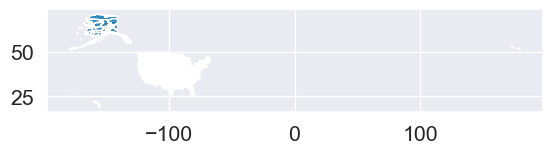

In [2]:
# prepare input and parameters
region_code = 'WECC'
# selected_states = ['CA', 'OR', 'WA']
dac_designation = read_csv('Network/Joint_office_DAC_lookup.csv')

state_id_file = 'Network/ccst_geoid_key_transp_geo_with_imputation.csv'
state_id_lookup = read_csv(state_id_file)

# generate map visualization
us_tract_file = 'Network/census_tracts_2017.geojson'
us_tracts_geojson =  gpd.read_file(us_tract_file) # load shapefile of CA tracts
us_tracts_geojson.loc[:, 'home_GEOID'] = us_tracts_geojson.loc[:, 'GEOID'].astype(int)
# CA_tracts_geojson.loc[:, 'home_GEOID'] = CA_tracts_geojson.loc[:, 'GEOID'].astype(str).str.zfill(0)
#CA_tracts_geojson.head(5)
us_tracts_geojson.plot()

In [3]:
# load EV penetration
EV_penetration_by_scenario = None
# scenario_name_lookup = {'Baseline': 'Baseline', 'NEVI': 'NEVI'} 
#                         'Bookend': 'Bookend'}
analysis_year = 2030
scenarios = ['Baseline', 'NEVI only', 'IRA only', 'NEVI and IRA']


EV_penetration_dir = 'Output/' + region_code + '/EV_penetration/'
list_of_ev_penetration = \
os.listdir('Output/' + region_code + '/EV_penetration')

for scenario in scenarios:
#     print(file)
    file_name = 'EV_penetration_' + region_code + '_' + \
    str(analysis_year) + '_' + scenario + '.csv'

    scenario_output = \
    'Year ' + str(analysis_year) + ' ' + scenario
#     print(scenario_output)
    ev_penetration = read_csv(EV_penetration_dir + '/' + file_name)
    ev_penetration.loc[:, 'Description'] = scenario_output
    ev_penetration.loc[:, 'Year'] = analysis_year
    ev_penetration.loc[:, 'Scenario'] = scenario

    EV_penetration_by_scenario = pd.concat([EV_penetration_by_scenario, ev_penetration])
#     break
#     EV_penetration_by_scenario.head(5)    

EV_penetration_by_scenario.loc[:, 'EV_count'] = \
EV_penetration_by_scenario.loc[:, 'Total'] * \
(EV_penetration_by_scenario.loc[:, 'BEV_100'] + \
 EV_penetration_by_scenario.loc[:, 'BEV_300'] + \
 EV_penetration_by_scenario.loc[:, 'FCEV'] + \
EV_penetration_by_scenario.loc[:, 'PHEV_25'] + \
 EV_penetration_by_scenario.loc[:, 'PHEV_50'])

EV_penetration_by_scenario['EV_count'] = \
EV_penetration_by_scenario['EV_count'].astype(int)

WECC_states = EV_penetration_by_scenario.State.unique()
print(WECC_states)

print(EV_penetration_by_scenario.Scenario.unique())

EV_penetration_by_scenario.head(5)

['AZ' 'CA' 'CO' 'ID' 'MT' 'NM' 'NV' 'OR' 'UT' 'WA' 'WY']
['Baseline' 'NEVI only' 'IRA only' 'NEVI and IRA']


State  home_GEOID   BEV_100   BEV_300    FCEV  HEV_Gasoline  ICEV_Gasoline  \
0    AZ  4001942600  0.008395  0.112277  0.0000      0.014690       0.861490   
1    AZ  4001942700  0.008099  0.115696  0.0027      0.019668       0.845739   
2    AZ  4001944000  0.008963  0.126761  0.0000      0.013764       0.847311   
3    AZ  4001944100  0.004006  0.136218  0.0000      0.006410       0.849760   
4    AZ  4001944201  0.003800  0.117815  0.0000      0.019477       0.844656   

   ICEV_NG   PHEV_25   PHEV_50  Total         Description  Year  Scenario  \
0      0.0  0.001049  0.002099    953  Year 2030 Baseline  2030  Baseline   
1      0.0  0.001928  0.006170   2593  Year 2030 Baseline  2030  Baseline   
2      0.0  0.000960  0.002241   3124  Year 2030 Baseline  2030  Baseline   
3      0.0  0.001202  0.002404   2496  Year 2030 Baseline  2030  Baseline   
4      0.0  0.000950  0.013302   2105  Year 2030 Baseline  2030  Baseline   

   EV_count  
0       117  
1       348  
2       433  
3       358  
4       285

In [4]:
EV_VMT_by_scenario = None


EV_penetration_dir = 'Output/' + region_code + '/EV_VMT/'
list_of_ev_vmt = os.listdir('Output/' + region_code + '/EV_VMT')
for scenario in scenarios:
#     print(file)
    file_name = 'raw_VMT_' + region_code + '_' + \
    str(analysis_year) + '_' + scenario + '.csv'

    scenario_output = \
    'Year ' + str(analysis_year) + ' ' + scenario
#     print(scenario_output)
    ev_vmt = read_csv(EV_penetration_dir + '/' + file_name)
    ev_vmt.loc[:, 'Description'] = scenario_output
    ev_vmt.loc[:, 'Year'] = analysis_year
#         ev_vmt.loc[:, 'state'] = selected_state
    ev_vmt.loc[:, 'Scenario'] = scenario
    EV_VMT_by_scenario = pd.concat([EV_VMT_by_scenario, ev_vmt])
#     break
print(EV_VMT_by_scenario.Scenario.unique())
EV_VMT_by_scenario.head(5)    

['Baseline' 'NEVI only' 'IRA only' 'NEVI and IRA']


thru_GEOID thru_geotype  thru_microtype     BEV_100      BEV_300      FCEV  \
0  4001942600            C             6.0  172.078235  2287.299410  5.069177   
1  4001942700            C             6.0  121.564700  1612.019766  3.366630   
2  4001944201            C             6.0    0.299362     3.850417  0.010323   
3  4001944202            C             6.0    0.070386     0.905307  0.002427   
4  4001944300            C             5.0    1.087329    13.985297  0.037494   

   HEV_Gasoline  ICEV_Gasoline  ICEV_NG    PHEV_25     PHEV_50          VMT  \
0    241.527222    3977.557931      0.0  77.733977  137.143738  6898.409691   
1    165.772686    2835.614049      0.0  52.239726   96.377924  4886.955481   
2      0.443882       5.594976      0.0   0.154843    0.247748    10.601551   
3      0.104365       1.315487      0.0   0.036406    0.058250     2.492629   
4      1.612246      20.321798      0.0   0.562411    0.899858    38.506433   

  State         Description  Year  Scenario  
0    UT  Year 2030 Baseline  2030  Baseline  
1    UT  Year 2030 Baseline  2030  Baseline  
2    UT  Year 2030 Baseline  2030  Baseline  
3    UT  Year 2030 Baseline  2030  Baseline  
4    UT  Year 2030 Baseline  2030  Baseline

In [5]:
group_var = ['thru_GEOID', 'thru_geotype', 'thru_microtype', 
             'Scenario', 'Year', 'Description']
EV_VMT_by_scenario = EV_VMT_by_scenario.groupby(group_var).sum()
EV_VMT_by_scenario = EV_VMT_by_scenario.reset_index()
EV_VMT_by_scenario = EV_VMT_by_scenario.drop(columns = 'State')
EV_VMT_by_scenario.head(5)

thru_GEOID thru_geotype  thru_microtype      Scenario  Year  \
0  4001942600            C             6.0      Baseline  2030   
1  4001942600            C             6.0      IRA only  2030   
2  4001942600            C             6.0  NEVI and IRA  2030   
3  4001942600            C             6.0     NEVI only  2030   
4  4001942700            C             6.0      Baseline  2030   

              Description      BEV_100       BEV_300        FCEV  \
0      Year 2030 Baseline  1162.399477  12730.093526   80.881226   
1      Year 2030 IRA only  1098.518851  13303.901785   32.698689   
2  Year 2030 NEVI and IRA  1216.749726  13986.308089   32.670004   
3     Year 2030 NEVI only  1281.820153  14267.955200   86.383695   
4      Year 2030 Baseline  2578.746071  29181.133228  214.490110   

   HEV_Gasoline  ICEV_Gasoline    ICEV_NG     PHEV_25      PHEV_50  \
0   1393.107099   46549.146438  10.398513  223.749942   566.298537   
1   1300.029018   46195.216281  14.202951  222.821613   548.685571   
2   1323.260294   45525.847559  12.298925  210.201793   408.738368   
3   1222.448874   44711.637186  10.540689  230.985536   904.303425   
4   3550.634820  131243.424962  20.519720  475.538097  1267.807137   

             VMT  
0   62716.074759  
1   62716.074759  
2   62716.074759  
3   62716.074759  
4  168532.294145

In [6]:
# append state and cbsa
state_id_lookup.head(5)
state_lookup = state_id_lookup[['GEOID', 'st_code', 'cbsa']]
EV_VMT_by_scenario = pd.merge(EV_VMT_by_scenario, 
                              state_lookup,
                             left_on = 'thru_GEOID', right_on = 'GEOID', how = 'left')

EV_VMT_by_scenario = EV_VMT_by_scenario.drop(columns = 'GEOID')
EV_VMT_by_scenario = EV_VMT_by_scenario.rename(columns = {'st_code':'State'})

state_lookup = state_id_lookup[['GEOID', 'cbsa']]
EV_penetration_by_scenario = pd.merge(EV_penetration_by_scenario, 
                                      state_lookup,
                             left_on = 'home_GEOID', right_on = 'GEOID', how = 'left')
EV_penetration_by_scenario = EV_penetration_by_scenario.drop(columns = 'GEOID')
EV_penetration_by_scenario.head(5)

State  home_GEOID   BEV_100   BEV_300    FCEV  HEV_Gasoline  ICEV_Gasoline  \
0    AZ  4001942600  0.008395  0.112277  0.0000      0.014690       0.861490   
1    AZ  4001942700  0.008099  0.115696  0.0027      0.019668       0.845739   
2    AZ  4001944000  0.008963  0.126761  0.0000      0.013764       0.847311   
3    AZ  4001944100  0.004006  0.136218  0.0000      0.006410       0.849760   
4    AZ  4001944201  0.003800  0.117815  0.0000      0.019477       0.844656   

   ICEV_NG   PHEV_25   PHEV_50  Total         Description  Year  Scenario  \
0      0.0  0.001049  0.002099    953  Year 2030 Baseline  2030  Baseline   
1      0.0  0.001928  0.006170   2593  Year 2030 Baseline  2030  Baseline   
2      0.0  0.000960  0.002241   3124  Year 2030 Baseline  2030  Baseline   
3      0.0  0.001202  0.002404   2496  Year 2030 Baseline  2030  Baseline   
4      0.0  0.000950  0.013302   2105  Year 2030 Baseline  2030  Baseline   

   EV_count     cbsa  
0       117  99999.0  
1       348  99999.0  
2       433  99999.0  
3       358  99999.0  
4       285  99999.0

In [7]:
# attach DAC attribute
print(dac_designation.columns)

dac_designation_short = dac_designation[['GEOID', 'POPULATION', 'NEVI_DAC']]
dac_designation_short.head(4)

EV_penetration_by_scenario = pd.merge(EV_penetration_by_scenario, 
                                      dac_designation_short,
                                      left_on = 'home_GEOID', 
                                      right_on = 'GEOID',
                                      how = 'left')

EV_VMT_by_scenario = pd.merge(EV_VMT_by_scenario, dac_designation_short,
                              left_on = 'thru_GEOID', 
                              right_on = 'GEOID',
                              how = 'left')

EV_VMT_by_scenario.head(5)

Index(['GEOID', 'CITY', 'COUNTY', 'STATEABB', 'COUNTYFIPS', 'CBSA', 'CBSANAME',
       'STATEFIPS', 'POPULATION', 'DOE_DAC',
       ...
       'EconomyDis', 'EquityDis', 'Resilien_1', 'EnviroDis', 'SumDis',
       'DOT_DAC', 'Shape_Leng', 'Shape_Area', 'Count', 'NEVI_DAC'],
      dtype='object', length=129)


thru_GEOID thru_geotype  thru_microtype      Scenario  Year  \
0  4001942600            C             6.0      Baseline  2030   
1  4001942600            C             6.0      IRA only  2030   
2  4001942600            C             6.0  NEVI and IRA  2030   
3  4001942600            C             6.0     NEVI only  2030   
4  4001942700            C             6.0      Baseline  2030   

              Description      BEV_100       BEV_300        FCEV  \
0      Year 2030 Baseline  1162.399477  12730.093526   80.881226   
1      Year 2030 IRA only  1098.518851  13303.901785   32.698689   
2  Year 2030 NEVI and IRA  1216.749726  13986.308089   32.670004   
3     Year 2030 NEVI only  1281.820153  14267.955200   86.383695   
4      Year 2030 Baseline  2578.746071  29181.133228  214.490110   

   HEV_Gasoline  ICEV_Gasoline    ICEV_NG     PHEV_25      PHEV_50  \
0   1393.107099   46549.146438  10.398513  223.749942   566.298537   
1   1300.029018   46195.216281  14.202951  222.821613   548.685571   
2   1323.260294   45525.847559  12.298925  210.201793   408.738368   
3   1222.448874   44711.637186  10.540689  230.985536   904.303425   
4   3550.634820  131243.424962  20.519720  475.538097  1267.807137   

             VMT State   cbsa       GEOID  POPULATION  NEVI_DAC  
0   62716.074759    AZ  99999  4001942600      1742.0       1.0  
1   62716.074759    AZ  99999  4001942600      1742.0       1.0  
2   62716.074759    AZ  99999  4001942600      1742.0       1.0  
3   62716.074759    AZ  99999  4001942600      1742.0       1.0  
4  168532.294145    AZ  99999  4001942700      5345.0       1.0

In [8]:
# post-process EV VMT results
EV_VMT_by_scenario.loc[:, 'ICEV_VMT'] = EV_VMT_by_scenario.loc[:, 'HEV_Gasoline'] + \
EV_VMT_by_scenario.loc[:, 'ICEV_Gasoline'] + EV_VMT_by_scenario.loc[:, 'ICEV_NG'] + \
0.78 * EV_VMT_by_scenario.loc[:, 'PHEV_25'] + 0.38 * EV_VMT_by_scenario.loc[:, 'PHEV_50'] 

EV_VMT_by_scenario.loc[:, 'BEV_VMT'] = EV_VMT_by_scenario.loc[:, 'BEV_100'] + \
EV_VMT_by_scenario.loc[:, 'BEV_300'] + EV_VMT_by_scenario.loc[:, 'FCEV'] + \
0.22 * EV_VMT_by_scenario.loc[:, 'PHEV_25'] + 0.62 * EV_VMT_by_scenario.loc[:, 'PHEV_50'] 

EV_VMT_by_scenario.loc[:, 'ICEV_VMT_fraction'] = EV_VMT_by_scenario.loc[:, 'ICEV_VMT'] / \
EV_VMT_by_scenario.loc[:, 'VMT']

EV_VMT_by_scenario.loc[:, 'BEV_VMT_fraction'] = EV_VMT_by_scenario.loc[:, 'BEV_VMT'] / \
EV_VMT_by_scenario.loc[:, 'VMT']

EV_VMT_by_scenario.head(5)

thru_GEOID thru_geotype  thru_microtype      Scenario  Year  \
0  4001942600            C             6.0      Baseline  2030   
1  4001942600            C             6.0      IRA only  2030   
2  4001942600            C             6.0  NEVI and IRA  2030   
3  4001942600            C             6.0     NEVI only  2030   
4  4001942700            C             6.0      Baseline  2030   

              Description      BEV_100       BEV_300        FCEV  \
0      Year 2030 Baseline  1162.399477  12730.093526   80.881226   
1      Year 2030 IRA only  1098.518851  13303.901785   32.698689   
2  Year 2030 NEVI and IRA  1216.749726  13986.308089   32.670004   
3     Year 2030 NEVI only  1281.820153  14267.955200   86.383695   
4      Year 2030 Baseline  2578.746071  29181.133228  214.490110   

   HEV_Gasoline  ...            VMT  State   cbsa       GEOID  POPULATION  \
0   1393.107099  ...   62716.074759     AZ  99999  4001942600      1742.0   
1   1300.029018  ...   62716.074759     AZ  99999  4001942600      1742.0   
2   1323.260294  ...   62716.074759     AZ  99999  4001942600      1742.0   
3   1222.448874  ...   62716.074759     AZ  99999  4001942600      1742.0   
4   3550.634820  ...  168532.294145     AZ  99999  4001942700      5345.0   

  NEVI_DAC       ICEV_VMT       BEV_VMT  ICEV_VMT_fraction  BEV_VMT_fraction  
0      1.0   48342.370449  14373.704310           0.770813          0.229187  
1      1.0   47891.749625  14824.325134           0.763628          0.236372  
2      1.0   47180.684757  15535.390002           0.752290          0.247710  
3      1.0   46468.430769  16247.643990           0.740933          0.259067  
4      1.0  135667.265929  32865.028215           0.804993          0.195007  

[5 rows x 24 columns]

## Part 2 -- Generation bar charts (EV VMT Penetration)

Scenario       BEV_VMT           VMT    VMT change
0      Baseline  3.379266e+08  1.564319e+09  0.000000e+00
1      IRA only  3.508394e+08  1.564319e+09  1.291279e+07
2  NEVI and IRA  3.650835e+08  1.564319e+09  2.715693e+07
3     NEVI only  3.533939e+08  1.564319e+09  1.546730e+07

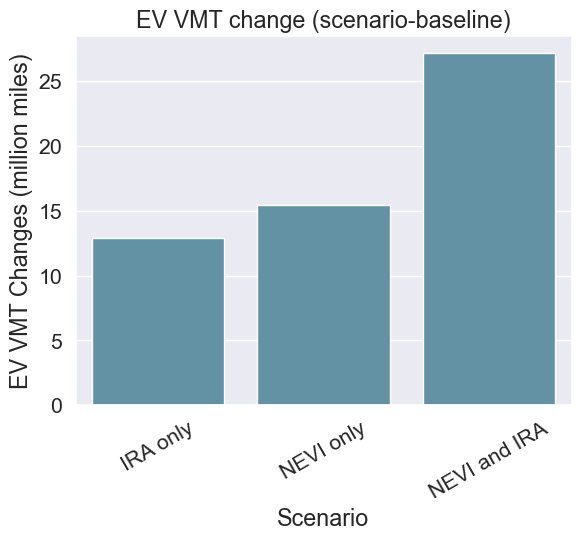

In [27]:
# plot the change of VMT, all states combined
# EV_VMT_by_scenario.head(5)
EV_VMT_comparison = \
EV_VMT_by_scenario.groupby(['Scenario'])[['BEV_VMT', 'VMT']].sum()
EV_VMT_comparison = EV_VMT_comparison.reset_index()

EV_VMT_comparison.loc[:, 'VMT change'] = 0

EV_VMT_comparison.loc[:, 'VMT change'] = \
EV_VMT_comparison.loc[:, 'BEV_VMT'] - \
float(EV_VMT_comparison.loc[EV_VMT_comparison['Scenario'] == 'Baseline', 'BEV_VMT'])
EV_VMT_comparison.head(5)

EV_VMT_to_plot = EV_VMT_comparison.loc[EV_VMT_comparison['Scenario'] != 'Baseline']
EV_VMT_to_plot = EV_VMT_to_plot.sort_values(by = 'VMT change', 
                                            ascending = True)

EV_VMT_to_plot['VMT change'] /=1000000 # convert to million miles 
sns.set(font_scale=1.4)  # larger font
sns.barplot(x = "Scenario", y = "VMT change", data = EV_VMT_to_plot, 
            color = '#5797af', alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('Scenario')
plt.ylabel('EV VMT Changes (million miles)')
plt.title('EV VMT change (scenario-baseline)')
plt.savefig('Plot/' + region_code + '/' + region_code + '_EV_VMT_delta.png', 
            dpi = 300, bbox_inches = 'tight')
# # plt.show()
EV_VMT_comparison.head(5)

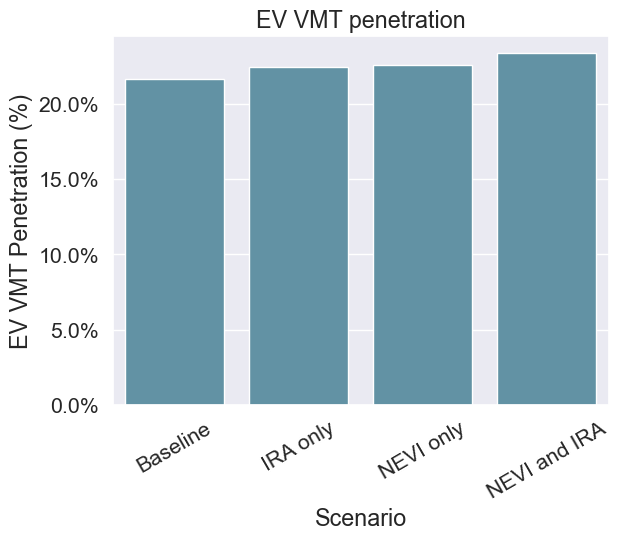

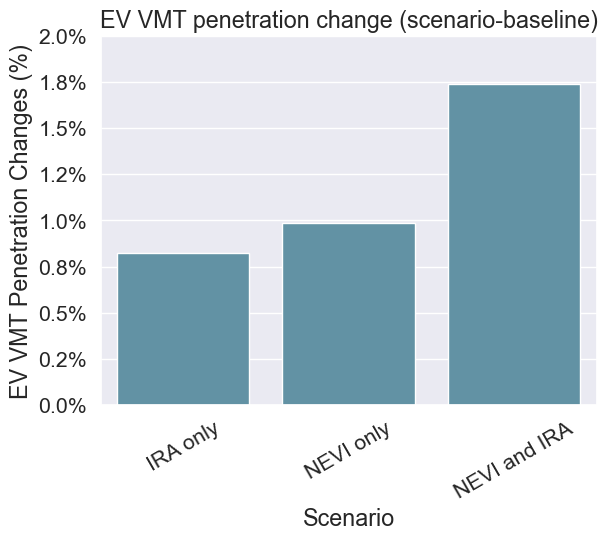

In [28]:
# plot the change of VMT fraction
EV_VMT_comparison.loc[:, 'VMT fraction'] = \
EV_VMT_comparison.loc[:, 'BEV_VMT'] / EV_VMT_comparison.loc[:, 'VMT']
EV_VMT_comparison.loc[:, 'VMT frac change'] = 0

EV_VMT_comparison = EV_VMT_comparison.sort_values(by = 'VMT fraction')
ax = sns.barplot(x = "Scenario", y = "VMT fraction", 
                 data = EV_VMT_comparison, 
            color = '#5797af', alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('Scenario')
plt.ylabel('EV VMT Penetration (%)')
# plt.ylim([0, 0.02])
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
plt.title('EV VMT penetration')
plt.savefig('Plot/' + region_code + '/' + region_code + '_EV_VMT_frac.png', 
            dpi = 300, bbox_inches = 'tight')
plt.show()

EV_VMT_comparison.loc[:, 'VMT penetration change'] = \
EV_VMT_comparison.loc[:, 'VMT fraction'] - \
float(EV_VMT_comparison.loc[EV_VMT_comparison['Scenario'] == 'Baseline', 'VMT fraction'])

VMT_penetration_to_plot = \
EV_VMT_comparison.loc[EV_VMT_comparison['Scenario'] != 'Baseline']
VMT_penetration_to_plot = \
VMT_penetration_to_plot.sort_values(by = 'VMT penetration change', 
                                    ascending = True)

ax = sns.barplot(x = "Scenario", y = "VMT penetration change", 
                 data = VMT_penetration_to_plot, 
            color = '#5797af', alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('Scenario')
plt.ylabel('EV VMT Penetration Changes (%)')
plt.ylim([0, 0.02])
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
plt.title('EV VMT penetration change (scenario-baseline)')
plt.savefig('Plot/' + region_code + '/' + region_code + '_EV_VMT_frac_delta.png', 
            dpi = 300, bbox_inches = 'tight')

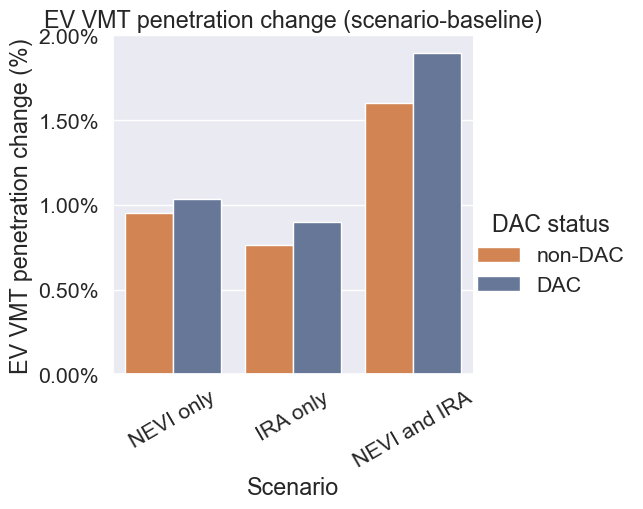

In [29]:
# Plot the VMT fraction changes by dac
VMT_comparison_by_dac = \
pd.pivot_table(EV_VMT_by_scenario, values=['BEV_VMT', 'VMT'], 
               index=['NEVI_DAC'], 
               columns=['Scenario'], aggfunc=np.sum, fill_value=0)
VMT_comparison_by_dac = VMT_comparison_by_dac.reset_index()

VMT_comparison_by_dac.columns = ['DAC status', 
                                 'EV VMT Baseline', 
                                 'EV VMT IRA only', 
                                 'EV VMT NEVI and IRA',
                                 'EV VMT NEVI only',
                                 'VMT Baseline', 
                                 'VMT IRA only', 
                                 'VMT NEVI and IRA',
                                 'VMT NEVI only']

for scenario in scenarios:
    out_attr = 'EV penetration ' + scenario
    numerator = 'EV VMT ' + scenario
    denominator = 'VMT ' + scenario
    VMT_comparison_by_dac[out_attr] = \
    VMT_comparison_by_dac[numerator] / \
    VMT_comparison_by_dac[denominator]

for scenario in scenarios:
    # out_attr = 'EV penetration ' + scenario
    base_frac = 'EV penetration Baseline'
    alt_frac = 'EV penetration ' + scenario
    VMT_comparison_by_dac[scenario] = \
    VMT_comparison_by_dac[alt_frac] - \
    VMT_comparison_by_dac[base_frac]


VMT_comparison_by_dac_long = pd.melt(VMT_comparison_by_dac,
                                id_vars=['DAC status'], 
                                value_vars = scenarios,
                                var_name = 'Scenario', 
                                value_name='EV penetration change')
VMT_comparison_by_dac_long = \
VMT_comparison_by_dac_long.reset_index()

# # Create an array with the colors you want to use
colors = ["#e7803e", "#5f74a0"]
dac_lookup = {0: 'non-DAC', 1: 'DAC'}
VMT_comparison_by_dac_long = \
VMT_comparison_by_dac_long.loc[VMT_comparison_by_dac_long['Scenario'] != 'Baseline']
VMT_comparison_by_dac_long['DAC status'] = \
VMT_comparison_by_dac_long['DAC status'].astype(int)
VMT_comparison_by_dac_long['DAC status'] = \
VMT_comparison_by_dac_long['DAC status'].map(dac_lookup)
VMT_comparison_by_dac_long.head(5)
# # Set your custom color palette
sns.set_palette(sns.color_palette(colors))
# plt.figure(figsize = (5, 10))
ax = sns.catplot(kind = 'bar', data = VMT_comparison_by_dac_long,
            x = 'Scenario', y = 'EV penetration change', 
#             color = '#5797af', 
            hue = 'DAC status',
            height=4.5, aspect=1.2)
plt.xticks(rotation = 30)
plt.ylabel('EV VMT penetration change (%)')

for ax in ax.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim([0, 0.02])
plt.title('EV VMT penetration change (scenario-baseline)')
plt.savefig('Plot/' + region_code + \
            '/' + region_code + '_EV_VMT_frac_by_dac_delta.png', 
            dpi = 300, bbox_inches = 'tight')
plt.show()

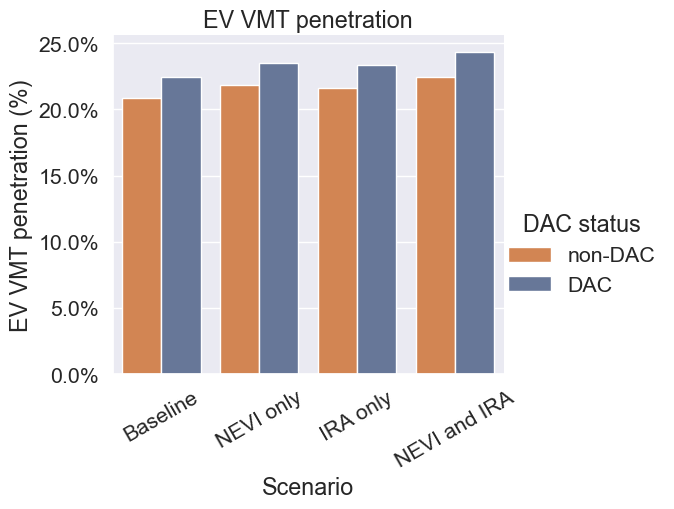

In [12]:
# plot EV VMT penetration by DAC
prefix = 'EV penetration '
penetration_cols = [prefix + s for s in scenarios]

VMT_comparison_by_dac_long = pd.melt(VMT_comparison_by_dac,
                                id_vars=['DAC status'], 
                                value_vars = penetration_cols,
                                var_name = 'Scenario', 
                                value_name='EV penetration')
VMT_comparison_by_dac_long = \
VMT_comparison_by_dac_long.reset_index()

# # Create an array with the colors you want to use
colors = ["#e7803e", "#5f74a0"]
dac_lookup = {0: 'non-DAC', 1: 'DAC'}
VMT_comparison_by_dac_long.loc[:, 'Scenario'] = \
VMT_comparison_by_dac_long.loc[:, 'Scenario'].str.split('EV penetration ').str[1]
VMT_comparison_by_dac_long['DAC status'] = \
VMT_comparison_by_dac_long['DAC status'].astype(int)
VMT_comparison_by_dac_long['DAC status'] = \
VMT_comparison_by_dac_long['DAC status'].map(dac_lookup)

# # Set your custom color palette
sns.set_palette(sns.color_palette(colors))
# plt.figure(figsize = (5, 10))
ax = sns.catplot(kind = 'bar', data = VMT_comparison_by_dac_long,
            x = 'Scenario', y = 'EV penetration', order = scenarios, 
#             color = '#5797af', 
            hue = 'DAC status',
            height=4.5, aspect=1.2)
plt.xticks(rotation = 30)
plt.ylabel('EV VMT penetration (%)')

for ax in ax.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
# plt.ylim([0, 0.02])
plt.title('EV VMT penetration')
plt.savefig('Plot/' + region_code + \
            '/' + region_code + '_EV_VMT_frac_by_dac.png', 
            dpi = 300, bbox_inches = 'tight')
plt.show()

In [13]:
VMT_comparison_by_dac_long

index DAC status      Scenario  EV penetration
0      0    non-DAC      Baseline        0.208787
1      1        DAC      Baseline        0.224754
2      2    non-DAC     NEVI only        0.218298
3      3        DAC     NEVI only        0.235097
4      4    non-DAC      IRA only        0.216413
5      5        DAC      IRA only        0.233768
6      6    non-DAC  NEVI and IRA        0.224828
7      7        DAC  NEVI and IRA        0.243708

State      Scenario       BEV_VMT           VMT    VMT change
0    AZ      Baseline  3.206227e+07  1.433383e+08  0.000000e+00
1    AZ      IRA only  3.365607e+07  1.433383e+08  1.593801e+06
2    AZ  NEVI and IRA  3.580088e+07  1.433383e+08  3.738610e+06
3    AZ     NEVI only  3.496259e+07  1.433383e+08  2.900321e+06
4    CA      Baseline  1.814471e+08  8.064558e+08  0.000000e+00

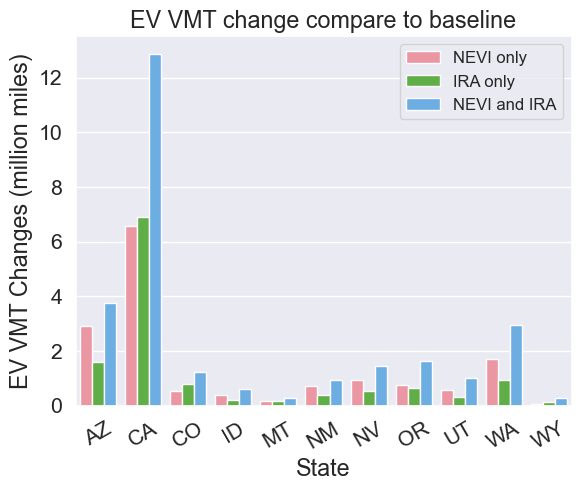

In [21]:
# plot EV VMT change by state

EV_VMT_comparison_state = \
EV_VMT_by_scenario.groupby(['State', 'Scenario'])[['BEV_VMT', 'VMT']].sum()
EV_VMT_comparison_state = EV_VMT_comparison_state.reset_index()

EV_VMT_comparison_state = \
EV_VMT_comparison_state.loc[EV_VMT_comparison_state['State'].isin(WECC_states)]

EV_VMT_comparison_state.loc[:, 'VMT change'] = 0

for state in WECC_states:
    state_idx = (EV_VMT_comparison_state['State'] == state)
    base_idx = (EV_VMT_comparison_state['Scenario'] == 'Baseline')
    EV_VMT_comparison_state.loc[state_idx, 'VMT change'] = \
    EV_VMT_comparison_state.loc[state_idx, 'BEV_VMT'] - \
    float(EV_VMT_comparison_state.loc[state_idx & base_idx, 'BEV_VMT'])
    EV_VMT_comparison_state.head(5)

EV_VMT_to_plot = \
EV_VMT_comparison_state.loc[EV_VMT_comparison_state['Scenario'] != 'Baseline']

EV_VMT_to_plot = EV_VMT_to_plot.sort_values(by = 'VMT change', 
                                            ascending = True)

EV_VMT_to_plot['VMT change'] /=1000000 # convert to million miles 
sns.barplot(x = "State", y = "VMT change", data = EV_VMT_to_plot, 
            hue = 'Scenario', order = WECC_states, 
            alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('State')
plt.ylabel('EV VMT Changes (million miles)')
plt.title('EV VMT change (scenario-baseline)')
plt.legend(loc = 1, fontsize = 12)
plt.savefig('Plot/' + region_code + \
            '/' + region_code + '_EV_VMT_delta_by_state.png', 
            dpi = 300, bbox_inches = 'tight')
# # plt.show()
EV_VMT_comparison_state.head(5)

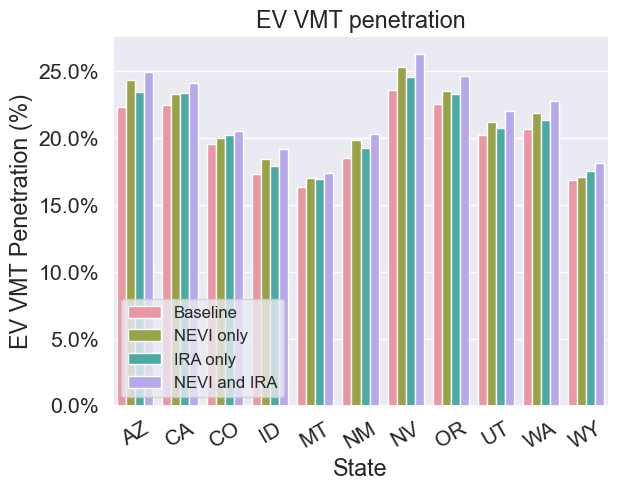

State   Scenario       BEV_VMT           VMT     VMT change  VMT fraction  \
20    MT   Baseline  4.048670e+06  2.480956e+07       0.000000      0.163190   
64    WY   Baseline  3.588642e+06  2.124911e+07       0.000000      0.168884   
21    MT   IRA only  4.206950e+06  2.480956e+07  158280.261361      0.169570   
23    MT  NEVI only  4.220188e+06  2.480956e+07  171518.154222      0.170103   
67    WY  NEVI only  3.629803e+06  2.124911e+07   41160.876721      0.170821   

    VMT frac change  
20         0.000000  
64         0.000000  
21         0.006380  
23         0.006913  
67         0.001937

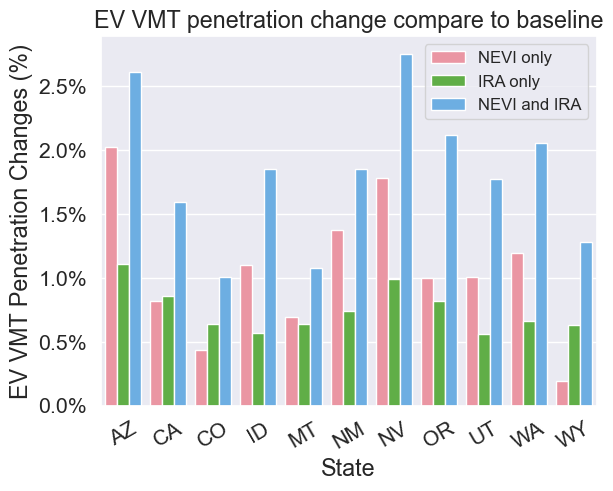

In [22]:
# plot EV VMT penetration change by state
EV_VMT_comparison_state.loc[:, 'VMT fraction'] = \
EV_VMT_comparison_state.loc[:, 'BEV_VMT'] / EV_VMT_comparison_state.loc[:, 'VMT']
EV_VMT_comparison_state.loc[:, 'VMT frac change'] = 0

EV_VMT_comparison_state = \
EV_VMT_comparison_state.sort_values(by = 'VMT fraction')
ax = sns.barplot(x = "State", y = "VMT fraction", 
                 data = EV_VMT_comparison_state,
                 hue = 'Scenario', order = WECC_states, 
                 hue_order = scenarios,
                 alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('State')
plt.ylabel('EV VMT Penetration (%)')
plt.title('EV VMT penetration')
plt.legend(loc = 3, fontsize = 12)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
# plt.ylim([0, 0.02])
plt.savefig('Plot/' + region_code + \
            '/' + region_code + '_EV_VMT_frac_by_state.png', 
            dpi = 300, bbox_inches = 'tight')
plt.show()


for state in WECC_states:
    state_idx = (EV_VMT_comparison_state['State'] == state)
    base_idx = (EV_VMT_comparison_state['Scenario'] == 'Baseline')
    EV_VMT_comparison_state.loc[state_idx, 'VMT frac change'] = \
    EV_VMT_comparison_state.loc[state_idx, 'VMT fraction'] - \
    float(EV_VMT_comparison_state.loc[state_idx & base_idx, 'VMT fraction'])
    EV_VMT_comparison_state.head(5)

EV_VMT_to_plot = \
EV_VMT_comparison_state.loc[EV_VMT_comparison_state['Scenario'] != 'Baseline']
EV_VMT_to_plot = EV_VMT_to_plot.sort_values(by = 'VMT frac change', 
                                            ascending = True)

ax = sns.barplot(x = "State", y = "VMT frac change", 
                 data = EV_VMT_to_plot,
                 hue = 'Scenario', order = WECC_states, 
                 alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('State')
plt.ylabel('EV VMT Penetration Changes (%)')
plt.title('EV VMT penetration change (scenario-baseline)')
plt.legend(loc = 1, fontsize = 12)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
# plt.ylim([0, 0.02])
plt.savefig('Plot/' + region_code + \
            '/' + region_code + '_EV_VMT_frac_delta_by_state.png', 
            dpi = 300, bbox_inches = 'tight')
# # plt.show()
EV_VMT_comparison_state.head(5)

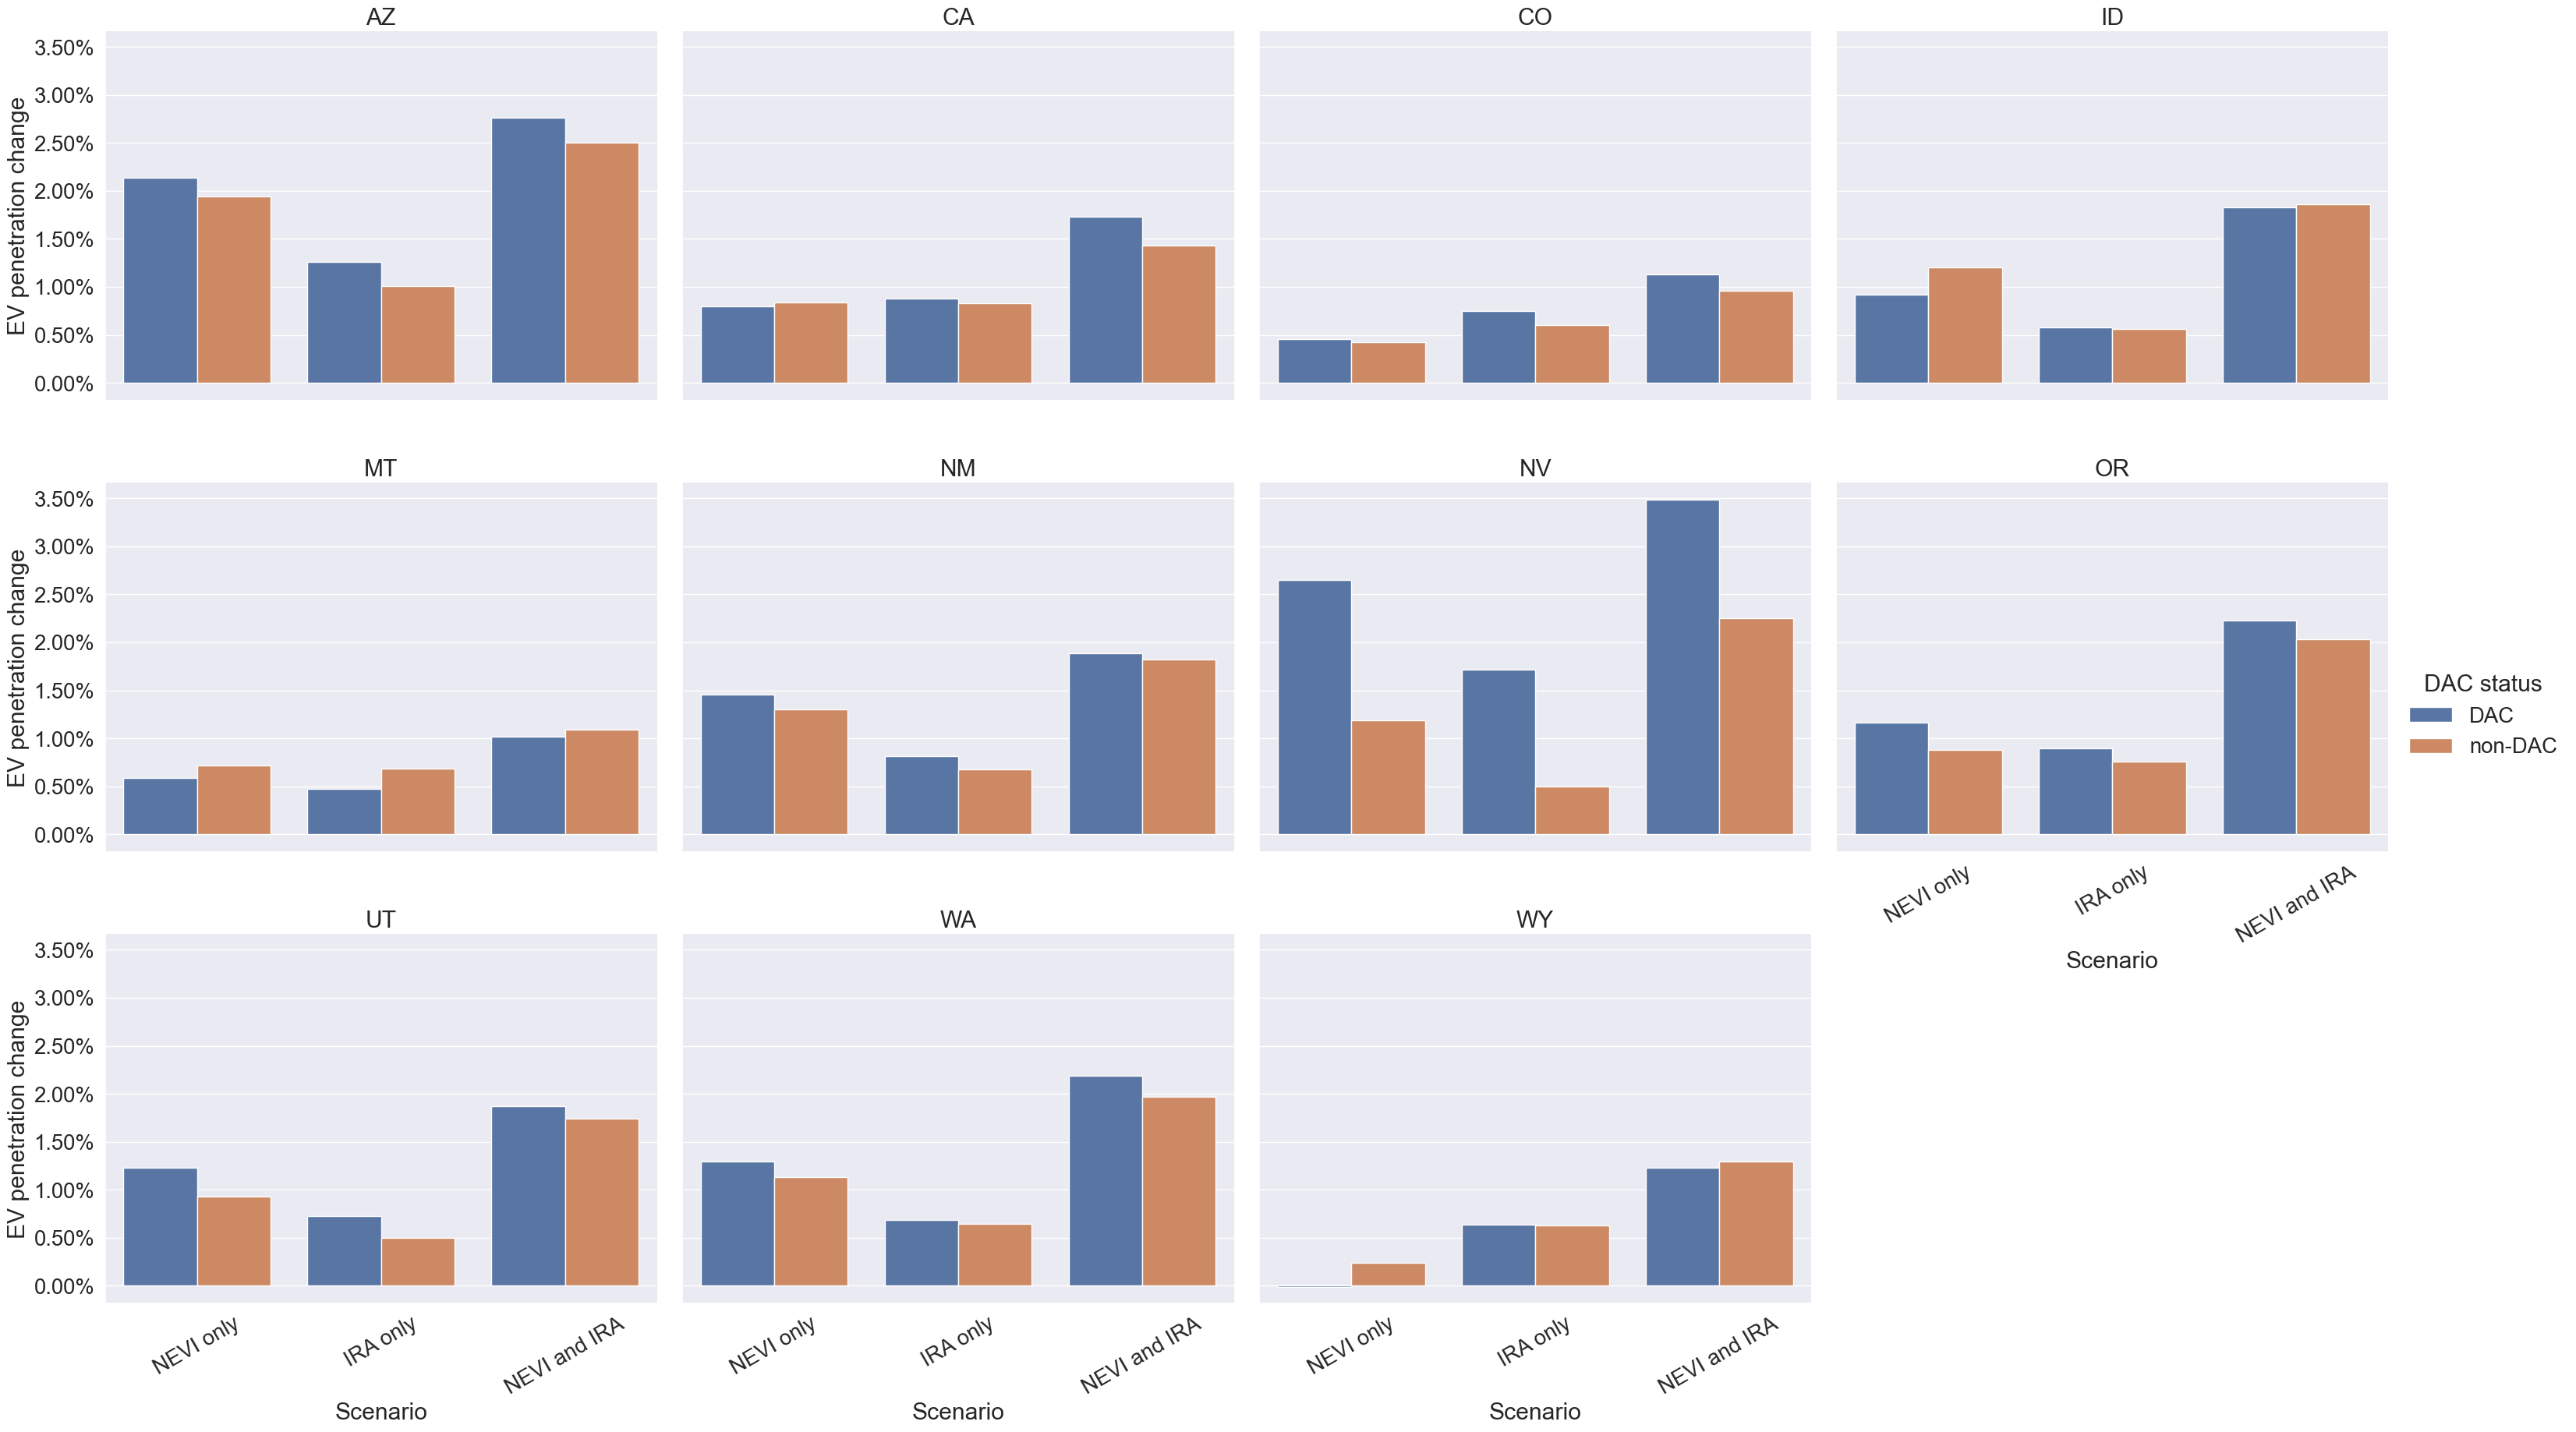

In [32]:
# Plot the VMT fraction changes by dac and state
VMT_comparison_by_dac_state = \
pd.pivot_table(EV_VMT_by_scenario, values=['BEV_VMT', 'VMT'], 
               index=['State', 'NEVI_DAC'], 
               columns=['Scenario'], aggfunc=np.sum, fill_value=0)
VMT_comparison_by_dac_state = VMT_comparison_by_dac_state.reset_index()
VMT_comparison_by_dac_state = \
VMT_comparison_by_dac_state.loc[VMT_comparison_by_dac_state['State'].isin(WECC_states)]
VMT_comparison_by_dac_state.columns = ['State', 'DAC status', 
                                 'EV VMT Baseline', 
                                 'EV VMT IRA only', 
                                 'EV VMT NEVI and IRA',
                                 'EV VMT NEVI only',
                                 'VMT Baseline', 
                                 'VMT IRA only', 
                                 'VMT NEVI and IRA',
                                 'VMT NEVI only']

for scenario in scenarios:
    out_attr = 'EV penetration ' + scenario
    numerator = 'EV VMT ' + scenario
    denominator = 'VMT ' + scenario
    VMT_comparison_by_dac_state[out_attr] = \
    VMT_comparison_by_dac_state[numerator] / \
    VMT_comparison_by_dac_state[denominator]

for scenario in scenarios:
    # out_attr = 'EV penetration ' + scenario
    base_frac = 'EV penetration Baseline'
    alt_frac = 'EV penetration ' + scenario
    VMT_comparison_by_dac_state[scenario] = \
    VMT_comparison_by_dac_state[alt_frac] - \
    VMT_comparison_by_dac_state[base_frac]


VMT_comparison_by_dac_state_long = pd.melt(VMT_comparison_by_dac_state,
                                id_vars=['State', 'DAC status'], 
                                value_vars = scenarios,
                                var_name = 'Scenario', 
                                value_name='EV penetration change')
VMT_comparison_by_dac_state_long = \
VMT_comparison_by_dac_state_long.reset_index()

# # Create an array with the colors you want to use
colors = ["#5f74a0", "#e7803e"]
dac_lookup = {0: 'non-DAC', 1: 'DAC'}
VMT_comparison_by_dac_state_long = \
VMT_comparison_by_dac_state_long.loc[VMT_comparison_by_dac_state_long['Scenario'] != 'Baseline']
VMT_comparison_by_dac_state_long['DAC status'] = \
VMT_comparison_by_dac_state_long['DAC status'].astype(int)
VMT_comparison_by_dac_state_long['DAC status'] = \
VMT_comparison_by_dac_state_long['DAC status'].map(dac_lookup)
VMT_comparison_by_dac_state_long = \
VMT_comparison_by_dac_state_long.sort_values('DAC status')
VMT_comparison_by_dac_state_long.head(5)

# # Set your custom color palette
sns.set_palette(sns.color_palette(colors))
# plt.figure(figsize = (5, 10))
sns.set(font_scale=1.8)  # larger font
VMT_comparison_by_dac_state_long = \
VMT_comparison_by_dac_state_long.sort_values('EV penetration change')
ax = sns.catplot(kind = 'bar', data = VMT_comparison_by_dac_state_long,
            x = 'Scenario', y = 'EV penetration change', 
#             color = '#5797af', 
            hue = 'DAC status',
            col = 'State', col_wrap = 4, col_order = WECC_states,
            height=6, aspect=1.3)
# plt.xticks(rotation = 30)
plt.ylabel('EV VMT penetration change (%)')
ax.set_titles("{col_name}")
for ax in ax.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    for label in ax.get_xticklabels():
        label.set_rotation(30)
# plt.ylim([0, 0.02])
plt.savefig('Plot/' + region_code + \
            '/' + region_code + '_EV_VMT_frac_by_dac_state_delta.png', 
            dpi = 300, bbox_inches = 'tight')
plt.show()

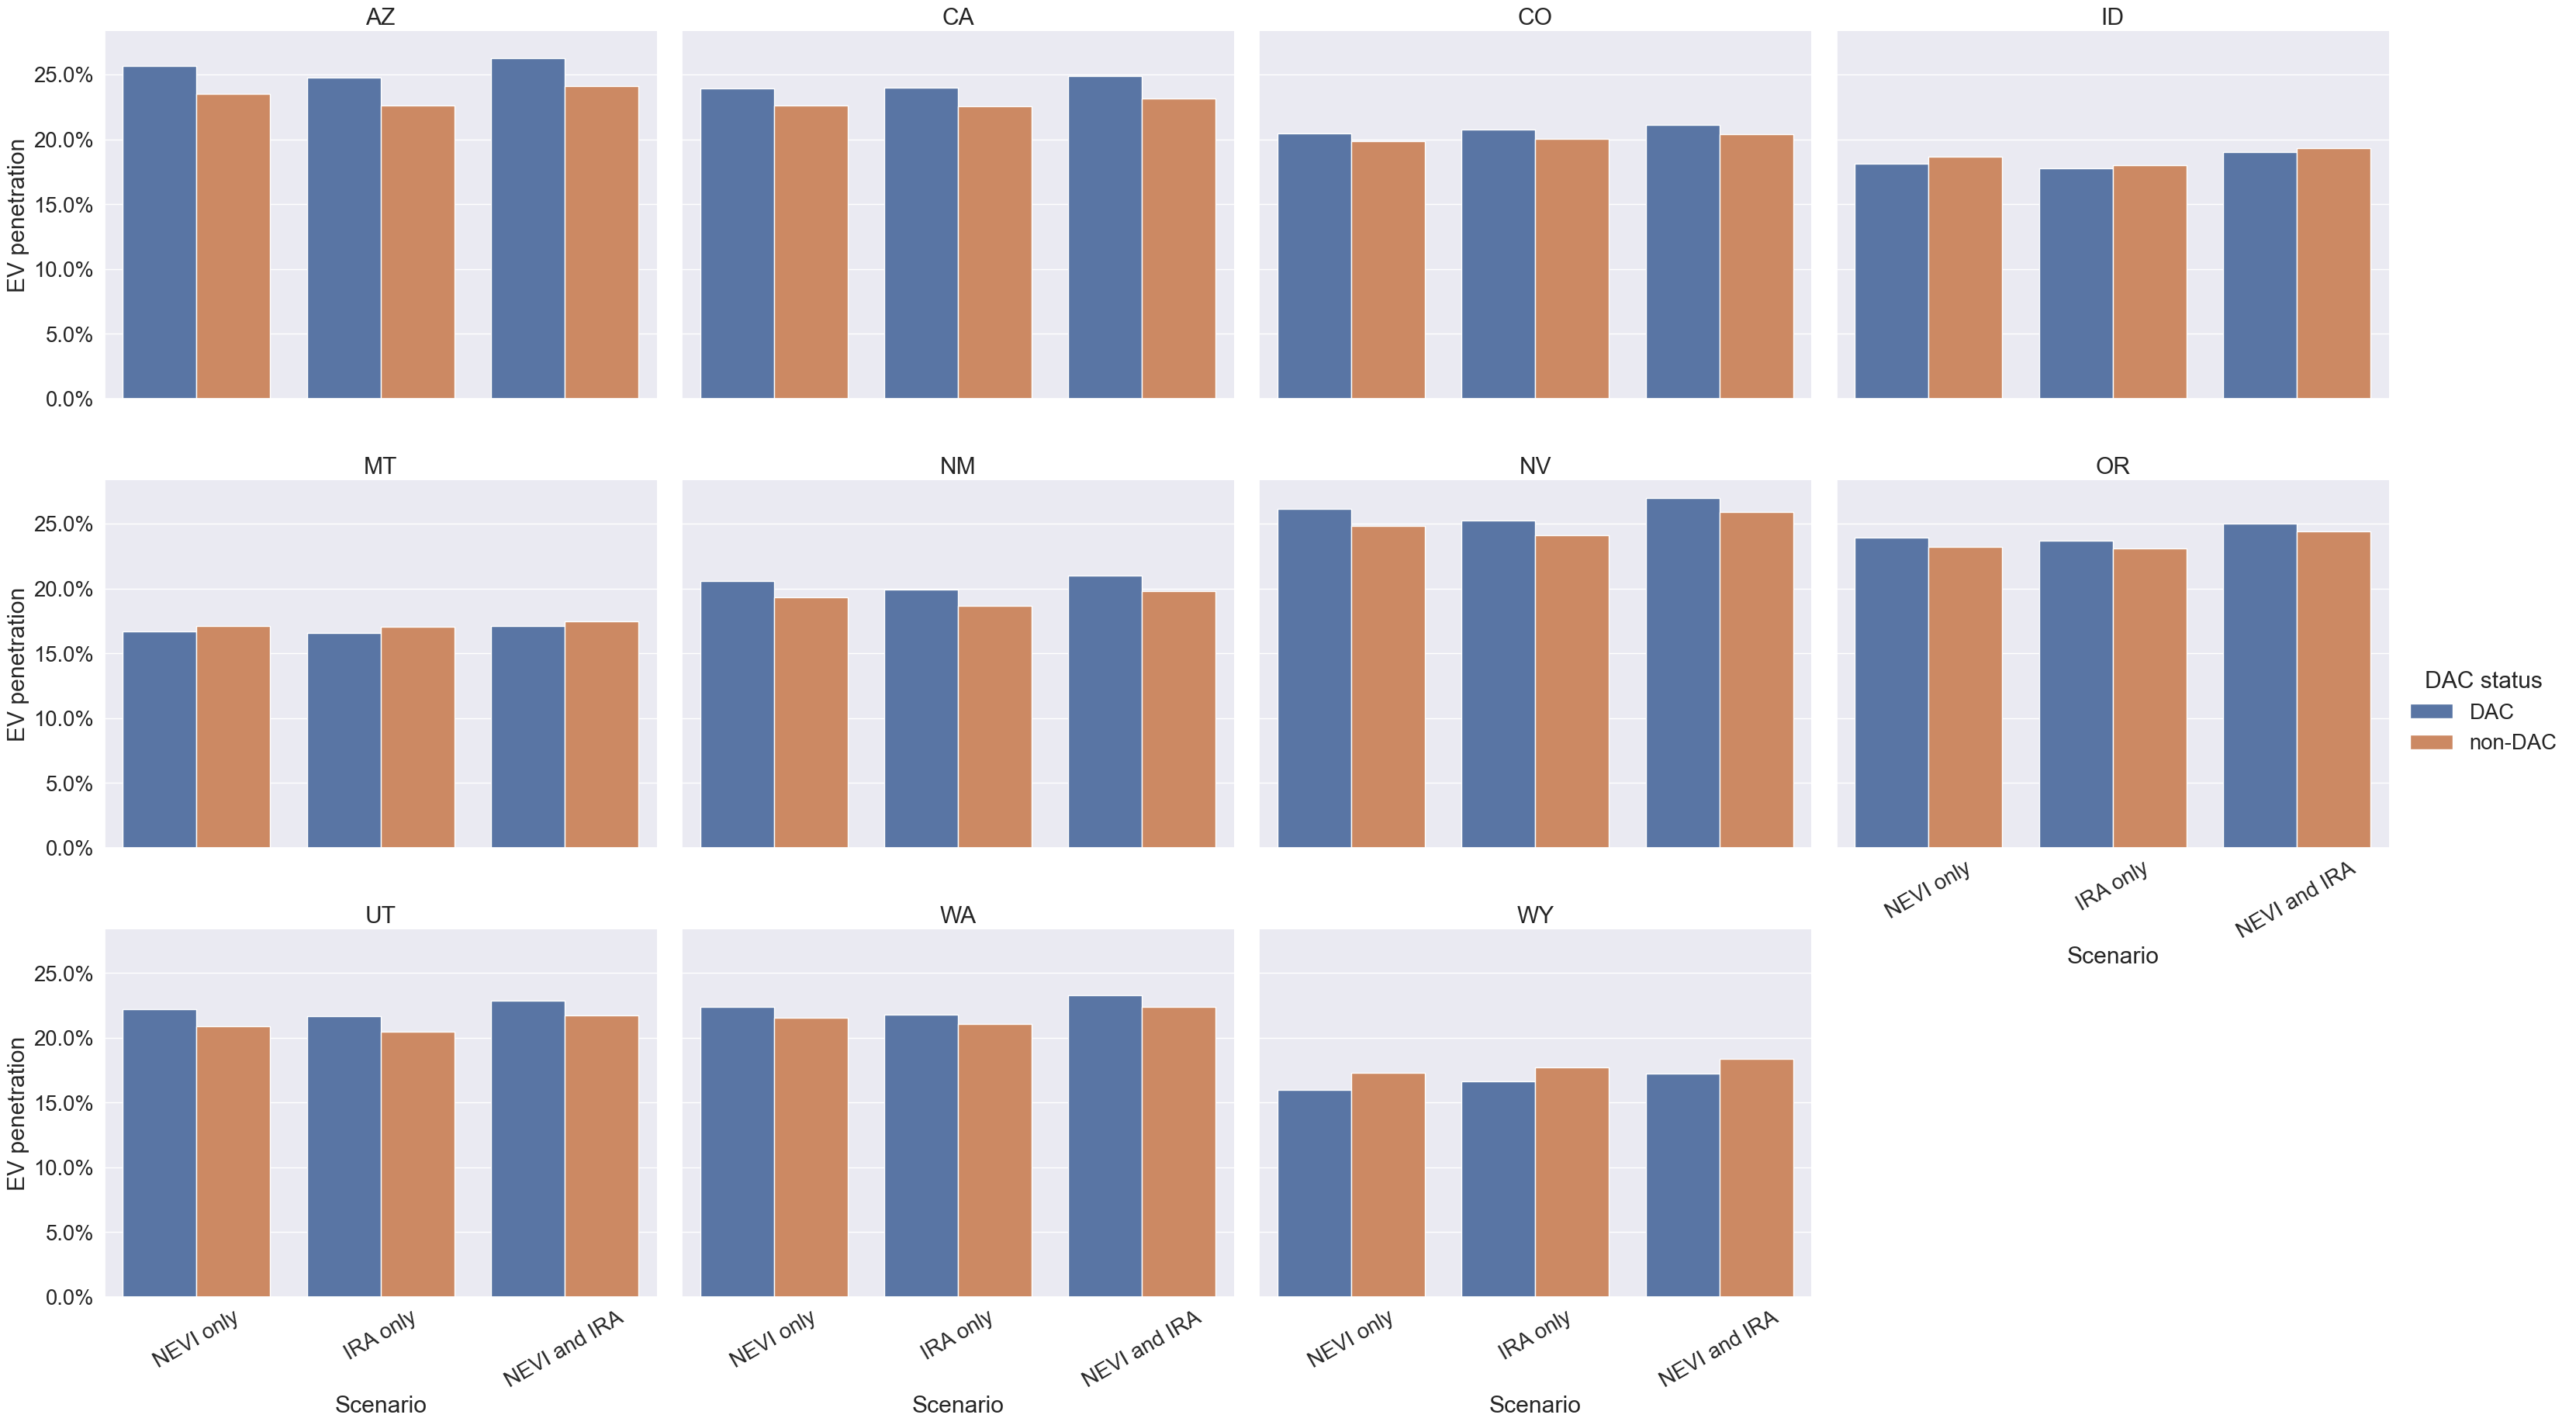

In [26]:
# plot EV penetration by DAC/non-DAC
prefix = 'EV penetration '
penetration_cols = [prefix + s for s in scenarios]
VMT_comparison_by_dac_state_long = pd.melt(VMT_comparison_by_dac_state,
                                id_vars=['State', 'DAC status'], 
                                value_vars = penetration_cols,
                                var_name = 'Scenario', 
                                value_name='EV penetration')
VMT_comparison_by_dac_state_long = \
VMT_comparison_by_dac_state_long.reset_index()
VMT_comparison_by_dac_state_long.loc[:, 'Scenario'] = \
VMT_comparison_by_dac_state_long.loc[:, 'Scenario'].str.split('EV penetration ').str[1]
# # Create an array with the colors you want to use
colors = ["#5f74a0", "#e7803e"]
dac_lookup = {0: 'non-DAC', 1: 'DAC'}
VMT_comparison_by_dac_state_long = \
VMT_comparison_by_dac_state_long.loc[VMT_comparison_by_dac_state_long['Scenario'] != 'Baseline']
VMT_comparison_by_dac_state_long['DAC status'] = \
VMT_comparison_by_dac_state_long['DAC status'].astype(int)
VMT_comparison_by_dac_state_long['DAC status'] = \
VMT_comparison_by_dac_state_long['DAC status'].map(dac_lookup)
VMT_comparison_by_dac_state_long = \
VMT_comparison_by_dac_state_long.sort_values('DAC status')
VMT_comparison_by_dac_state_long.head(5)

# # Set your custom color palette
sns.set_palette(sns.color_palette(colors))
# plt.figure(figsize = (5, 10))
sns.set(font_scale=1.8)  # larger font
VMT_comparison_by_dac_state_long = \
VMT_comparison_by_dac_state_long.sort_values('EV penetration')
ax = sns.catplot(kind = 'bar', data = VMT_comparison_by_dac_state_long,
            x = 'Scenario', y = 'EV penetration', 
#             color = '#5797af', 
            hue = 'DAC status',
            col = 'State', col_wrap = 4, col_order = WECC_states,
            height=6, aspect=1.3)
# plt.xticks(rotation = 30)
plt.ylabel('EV VMT penetration (%)')
ax.set_titles("{col_name}")
for ax in ax.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    for label in ax.get_xticklabels():
        label.set_rotation(30)
# plt.ylim([0, 0.02])
plt.savefig('Plot/' + region_code + \
            '/' + region_code + '_EV_VMT_frac_by_dac_delta.png', 
            dpi = 300, bbox_inches = 'tight')
plt.show()

In [33]:
VMT_comparison_by_dac_state.to_csv('Output/WECC/EV_VMT_by_scenario_check.csv')

## Part 3 -- Generation bar charts (EV adoption)

Scenario  EV_count     Total  Pop change
1      IRA only  13407950  57443386    0.429494
3     NEVI only  13518331  57442837    0.539875
2  NEVI and IRA  13985748  57443127    1.007292

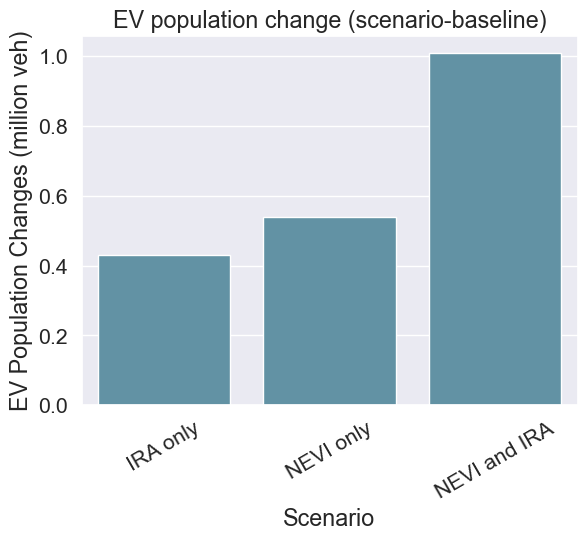

In [9]:
# Plot EV population changes

EV_pop_comparison = \
EV_penetration_by_scenario.groupby(['Scenario'])[['EV_count', 'Total']].sum()
# pd.pivot_table(EV_VMT_by_scenario, values='BEV_VMT', 
#                                    index=['year'], 
#                                    columns=['type'], aggfunc=np.sum, 
#                                    fill_value=0)

EV_pop_comparison = EV_pop_comparison.reset_index()

EV_pop_comparison.loc[:, 'Pop change'] = 0

EV_pop_comparison.loc[:, 'Pop change'] = \
EV_pop_comparison.loc[:, 'EV_count'] - \
float(EV_pop_comparison.loc[EV_pop_comparison['Scenario'] == 'Baseline', 'EV_count'])
EV_pop_comparison.head(5)

EV_pop_to_plot = EV_pop_comparison.loc[EV_pop_comparison['Scenario'] != 'Baseline']
EV_pop_to_plot = EV_pop_to_plot.sort_values(by = 'Pop change', 
                                            ascending = True)

EV_pop_to_plot['Pop change'] /=1000000 # convert to million vehicles 
sns.set(font_scale=1.4)  # larger font
sns.barplot(x = "Scenario", y = "Pop change", data = EV_pop_to_plot, 
            color = '#5797af', alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('Scenario')
plt.ylabel('EV Population Changes (million veh)')
plt.title('EV population change (scenario-baseline)')
plt.savefig('Plot/' + region_code + '/' + region_code + '_EV_pop_delta.png', 
            dpi = 300, bbox_inches = 'tight')
# # plt.show()
EV_pop_to_plot.head(5)

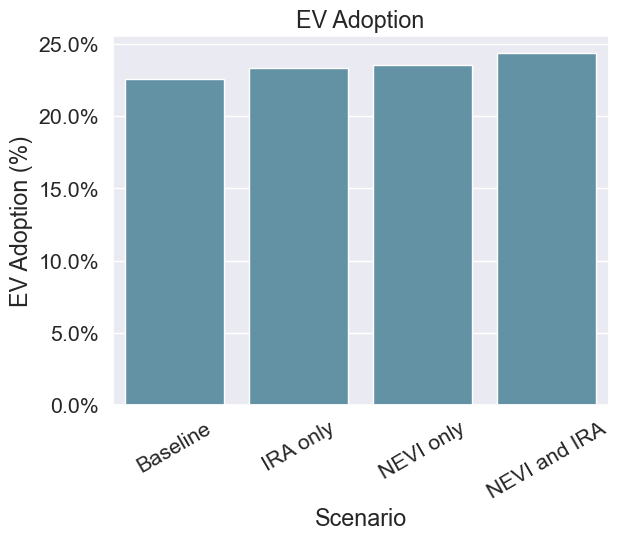

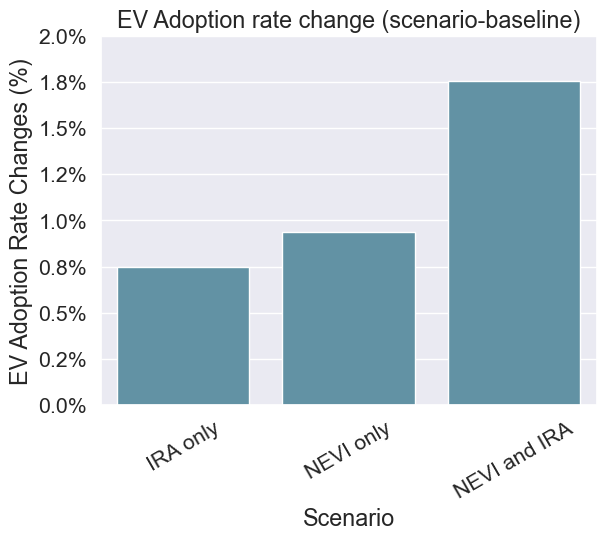

In [10]:
# plot the change of EV adoption
EV_pop_comparison.loc[:, 'EV fraction'] = \
EV_pop_comparison.loc[:, 'EV_count'] / EV_pop_comparison.loc[:, 'Total']
EV_pop_comparison.loc[:, 'EV frac change'] = 0

EV_pop_comparison = EV_pop_comparison.sort_values(by = 'EV fraction')
ax = sns.barplot(x = "Scenario", y = "EV fraction", 
                 data = EV_pop_comparison, 
            color = '#5797af', alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('Scenario')
plt.ylabel('EV Adoption (%)')
# plt.ylim([0, 0.02])
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
plt.title('EV Adoption')
plt.savefig('Plot/' + region_code + '/' + region_code + '_EV_pop_frac.png', 
            dpi = 300, bbox_inches = 'tight')
plt.show()

EV_pop_comparison.loc[:, 'EV frac change'] = \
EV_pop_comparison.loc[:, 'EV fraction'] - \
float(EV_pop_comparison.loc[EV_pop_comparison['Scenario'] == 'Baseline', 'EV fraction'])

EV_adoption_to_plot = \
EV_pop_comparison.loc[EV_pop_comparison['Scenario'] != 'Baseline']
EV_adoption_to_plot = \
EV_adoption_to_plot.sort_values(by = 'EV frac change', 
                                    ascending = True)

ax = sns.barplot(x = "Scenario", y = "EV frac change", 
                 data = EV_adoption_to_plot, 
            color = '#5797af', alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('Scenario')
plt.ylabel('EV Adoption Rate Changes (%)')
plt.ylim([0, 0.02])
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
plt.title('EV Adoption rate change (scenario-baseline)')
plt.savefig('Plot/' + region_code + '/' + region_code + '_EV_pop_frac_delta.png', 
            dpi = 300, bbox_inches = 'tight')

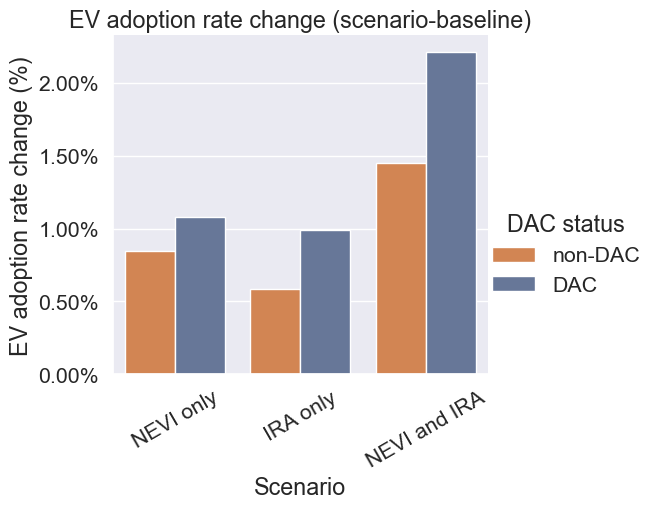

In [11]:
# plot adoption by DAC
ev_adoption_by_dac = \
pd.pivot_table(EV_penetration_by_scenario, values=['EV_count', 'Total'], 
               index=['NEVI_DAC'], 
               columns=['Scenario'], aggfunc=np.sum, fill_value=0)
ev_adoption_by_dac = ev_adoption_by_dac.reset_index()

ev_adoption_by_dac.columns = ['DAC status', 
                                 'EV Baseline', 
                                 'EV IRA only', 
                                 'EV NEVI and IRA',
                                 'EV NEVI only',
                                 'Total Baseline', 
                                 'Total IRA only', 
                                 'Total NEVI and IRA',
                                 'Total NEVI only']

for scenario in scenarios:
    out_attr = 'EV adoption ' + scenario
    numerator = 'EV ' + scenario
    denominator = 'Total ' + scenario
    ev_adoption_by_dac[out_attr] = \
    ev_adoption_by_dac[numerator] / \
    ev_adoption_by_dac[denominator]

for scenario in scenarios:
    # out_attr = 'EV penetration ' + scenario
    base_frac = 'EV adoption Baseline'
    alt_frac = 'EV adoption ' + scenario
    ev_adoption_by_dac[scenario] = \
    ev_adoption_by_dac[alt_frac] - \
    ev_adoption_by_dac[base_frac]


ev_adoption_by_dac_long = pd.melt(ev_adoption_by_dac,
                                id_vars=['DAC status'], 
                                value_vars = scenarios,
                                var_name = 'Scenario', 
                                value_name='EV adoption change')
ev_adoption_by_dac_long = \
ev_adoption_by_dac_long.reset_index()

# # Create an array with the colors you want to use
colors = ["#e7803e", "#5f74a0"]
dac_lookup = {0: 'non-DAC', 1: 'DAC'}
ev_adoption_by_dac_long = \
ev_adoption_by_dac_long.loc[ev_adoption_by_dac_long['Scenario'] != 'Baseline']
ev_adoption_by_dac_long['DAC status'] = \
ev_adoption_by_dac_long['DAC status'].astype(int)
ev_adoption_by_dac_long['DAC status'] = \
ev_adoption_by_dac_long['DAC status'].map(dac_lookup)
ev_adoption_by_dac_long.head(5)
# # Set your custom color palette
sns.set_palette(sns.color_palette(colors))
# plt.figure(figsize = (5, 10))
ax = sns.catplot(kind = 'bar', data = ev_adoption_by_dac_long,
            x = 'Scenario', y = 'EV adoption change', 
#             color = '#5797af', 
            hue = 'DAC status',
            height=4.5, aspect=1.2)
plt.xticks(rotation = 30)
plt.ylabel('EV adoption rate change (%)')

for ax in ax.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
# plt.ylim([0, 0.02])
plt.title('EV adoption rate change (scenario-baseline)')
plt.savefig('Plot/' + region_code + \
            '/' + region_code + '_EV_frac_by_dac_delta.png', 
            dpi = 300, bbox_inches = 'tight')
plt.show()


In [30]:
ev_adoption_by_dac.to_csv('Output/WECC/EV_count_by_scenario_check.csv')

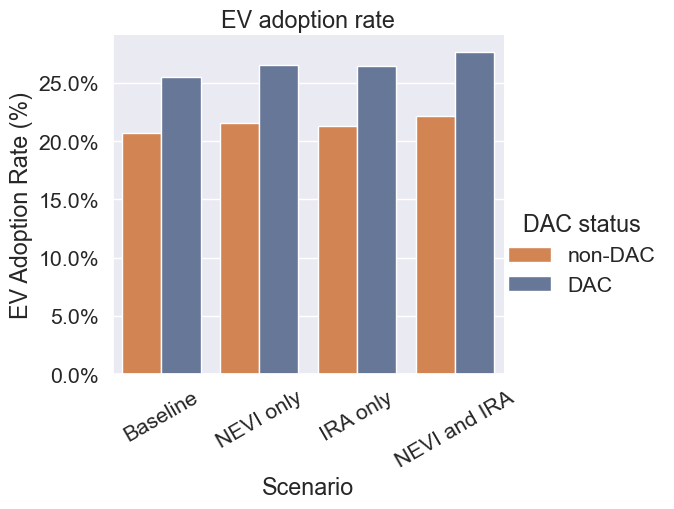

In [12]:
# plot EV adoption by DAC
prefix = 'EV adoption '
adoption_cols = [prefix + s for s in scenarios]

ev_adoption_by_dac_long = pd.melt(ev_adoption_by_dac,
                                id_vars=['DAC status'], 
                                value_vars = adoption_cols,
                                var_name = 'Scenario', 
                                value_name='EV adoption')
ev_adoption_by_dac_long = \
ev_adoption_by_dac_long.reset_index()

# # Create an array with the colors you want to use
colors = ["#e7803e", "#5f74a0"]
dac_lookup = {0: 'non-DAC', 1: 'DAC'}
ev_adoption_by_dac_long.loc[:, 'Scenario'] = \
ev_adoption_by_dac_long.loc[:, 'Scenario'].str.split('EV adoption ').str[1]
ev_adoption_by_dac_long['DAC status'] = \
ev_adoption_by_dac_long['DAC status'].astype(int)
ev_adoption_by_dac_long['DAC status'] = \
ev_adoption_by_dac_long['DAC status'].map(dac_lookup)

# # Set your custom color palette
sns.set_palette(sns.color_palette(colors))
# plt.figure(figsize = (5, 10))
ax = sns.catplot(kind = 'bar', data = ev_adoption_by_dac_long,
            x = 'Scenario', y = 'EV adoption', order = scenarios, 
#             color = '#5797af', 
            hue = 'DAC status',
            height=4.5, aspect=1.2)
plt.xticks(rotation = 30)
plt.ylabel('EV Adoption Rate (%)')

for ax in ax.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
# plt.ylim([0, 0.02])
plt.title('EV adoption rate')
plt.savefig('Plot/' + region_code + \
            '/' + region_code + '_EV_frac_by_dac.png', 
            dpi = 300, bbox_inches = 'tight')
plt.show()

State      Scenario  EV_count    Total  EV pop change
43    WY     NEVI only     89325   495536       0.001774
41    WY      IRA only     90764   495568       0.003213
42    WY  NEVI and IRA     92896   495561       0.005345
19    MT     NEVI only    187606  1008307       0.005356
17    MT      IRA only    188762  1008275       0.006512

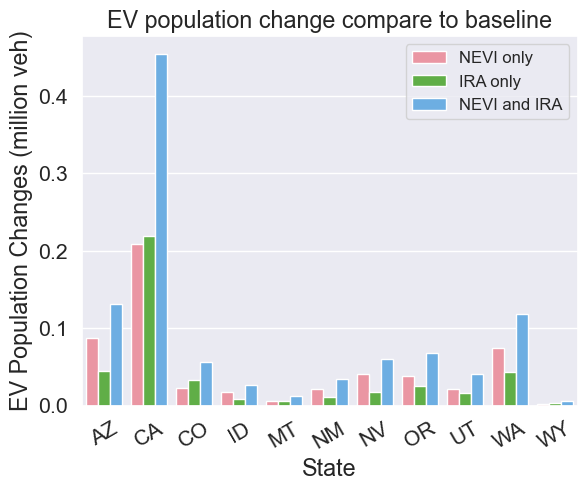

In [13]:
# plot EV adoption change by state

EV_pop_comparison_state = \
EV_penetration_by_scenario.groupby(['State', 'Scenario'])[['EV_count', 'Total']].sum()
EV_pop_comparison_state = EV_pop_comparison_state.reset_index()

EV_pop_comparison_state = \
EV_pop_comparison_state.loc[EV_pop_comparison_state['State'].isin(WECC_states)]

EV_pop_comparison_state.loc[:, 'EV pop change'] = 0

for state in WECC_states:
    state_idx = (EV_pop_comparison_state['State'] == state)
    base_idx = (EV_pop_comparison_state['Scenario'] == 'Baseline')
    EV_pop_comparison_state.loc[state_idx, 'EV pop change'] = \
    EV_pop_comparison_state.loc[state_idx, 'EV_count'] - \
    float(EV_pop_comparison_state.loc[state_idx & base_idx, 'EV_count'])
    EV_pop_comparison_state.head(5)

EV_pop_to_plot = \
EV_pop_comparison_state.loc[EV_pop_comparison_state['Scenario'] != 'Baseline']

EV_pop_to_plot = EV_pop_to_plot.sort_values(by = 'EV pop change', 
                                            ascending = True)

EV_pop_to_plot['EV pop change'] /=1000000 # convert to million miles 
sns.barplot(x = "State", y = "EV pop change", 
            data = EV_pop_to_plot, 
            hue = 'Scenario', order = WECC_states, 
            alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('State')
plt.ylabel('EV Population Changes (million veh)')
plt.title('EV population change (scenario-baseline)')
plt.legend(loc = 1, fontsize = 12)
plt.savefig('Plot/' + region_code + \
            '/' + region_code + '_EV_pop_delta_by_state.png', 
            dpi = 300, bbox_inches = 'tight')
# # plt.show()
EV_pop_to_plot.head(5)


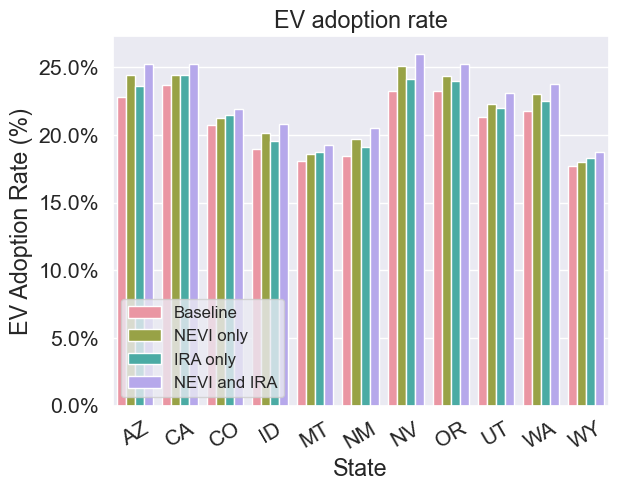

State   Scenario  EV_count    Total  EV pop change  EV fraction  \
43    WY  NEVI only     89325   495536           1774     0.180259   
11    CO  NEVI only   1008171  4749235          22278     0.212281   
19    MT  NEVI only    187606  1008307           5356     0.186060   
13    ID   IRA only    286096  1465037           8762     0.195282   
17    MT   IRA only    188762  1008275           6512     0.187213   

    EV frac change  
43        0.003585  
11        0.004691  
19        0.005302  
13        0.005982  
17        0.006454

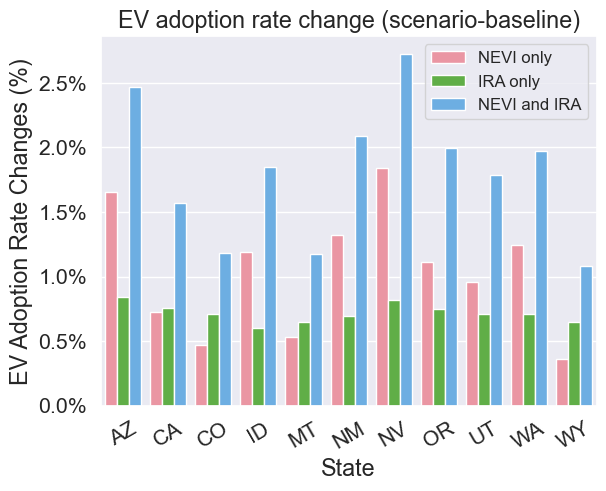

In [14]:
# plot EV adoption change by state
EV_pop_comparison_state.loc[:, 'EV fraction'] = \
EV_pop_comparison_state.loc[:, 'EV_count'] / \
EV_pop_comparison_state.loc[:, 'Total']
EV_pop_comparison_state.loc[:, 'EV frac change'] = 0

EV_pop_comparison_state = \
EV_pop_comparison_state.sort_values(by = 'EV fraction')
ax = sns.barplot(x = "State", y = "EV fraction", 
                 data = EV_pop_comparison_state,
                 hue = 'Scenario', order = WECC_states, 
                 hue_order = scenarios,
                 alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('State')
plt.ylabel('EV Adoption Rate (%)')
plt.title('EV adoption rate')
plt.legend(loc = 3, fontsize = 12)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
# plt.ylim([0, 0.02])
plt.savefig('Plot/' + region_code + \
            '/' + region_code + '_EV_frac_by_state.png', 
            dpi = 300, bbox_inches = 'tight')
plt.show()


for state in WECC_states:
    state_idx = (EV_pop_comparison_state['State'] == state)
    base_idx = (EV_pop_comparison_state['Scenario'] == 'Baseline')
    EV_pop_comparison_state.loc[state_idx, 'EV frac change'] = \
    EV_pop_comparison_state.loc[state_idx, 'EV fraction'] - \
    float(EV_pop_comparison_state.loc[state_idx & base_idx, 'EV fraction'])
    EV_pop_comparison_state.head(5)

EV_pop_to_plot = \
EV_pop_comparison_state.loc[EV_pop_comparison_state['Scenario'] != 'Baseline']
EV_pop_to_plot = EV_pop_to_plot.sort_values(by = 'EV frac change', 
                                            ascending = True)

ax = sns.barplot(x = "State", y = "EV frac change", 
                 data = EV_pop_to_plot,
                 hue = 'Scenario', order = WECC_states, 
                 alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('State')
plt.ylabel('EV Adoption Rate Changes (%)')
plt.title('EV adoption rate change (scenario-baseline)')
plt.legend(loc = 1, fontsize = 12)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
# plt.ylim([0, 0.02])
plt.savefig('Plot/' + region_code + \
            '/' + region_code + '_EV_frac_delta_by_state.png', 
            dpi = 300, bbox_inches = 'tight')
# # plt.show()
EV_pop_to_plot.head(5)

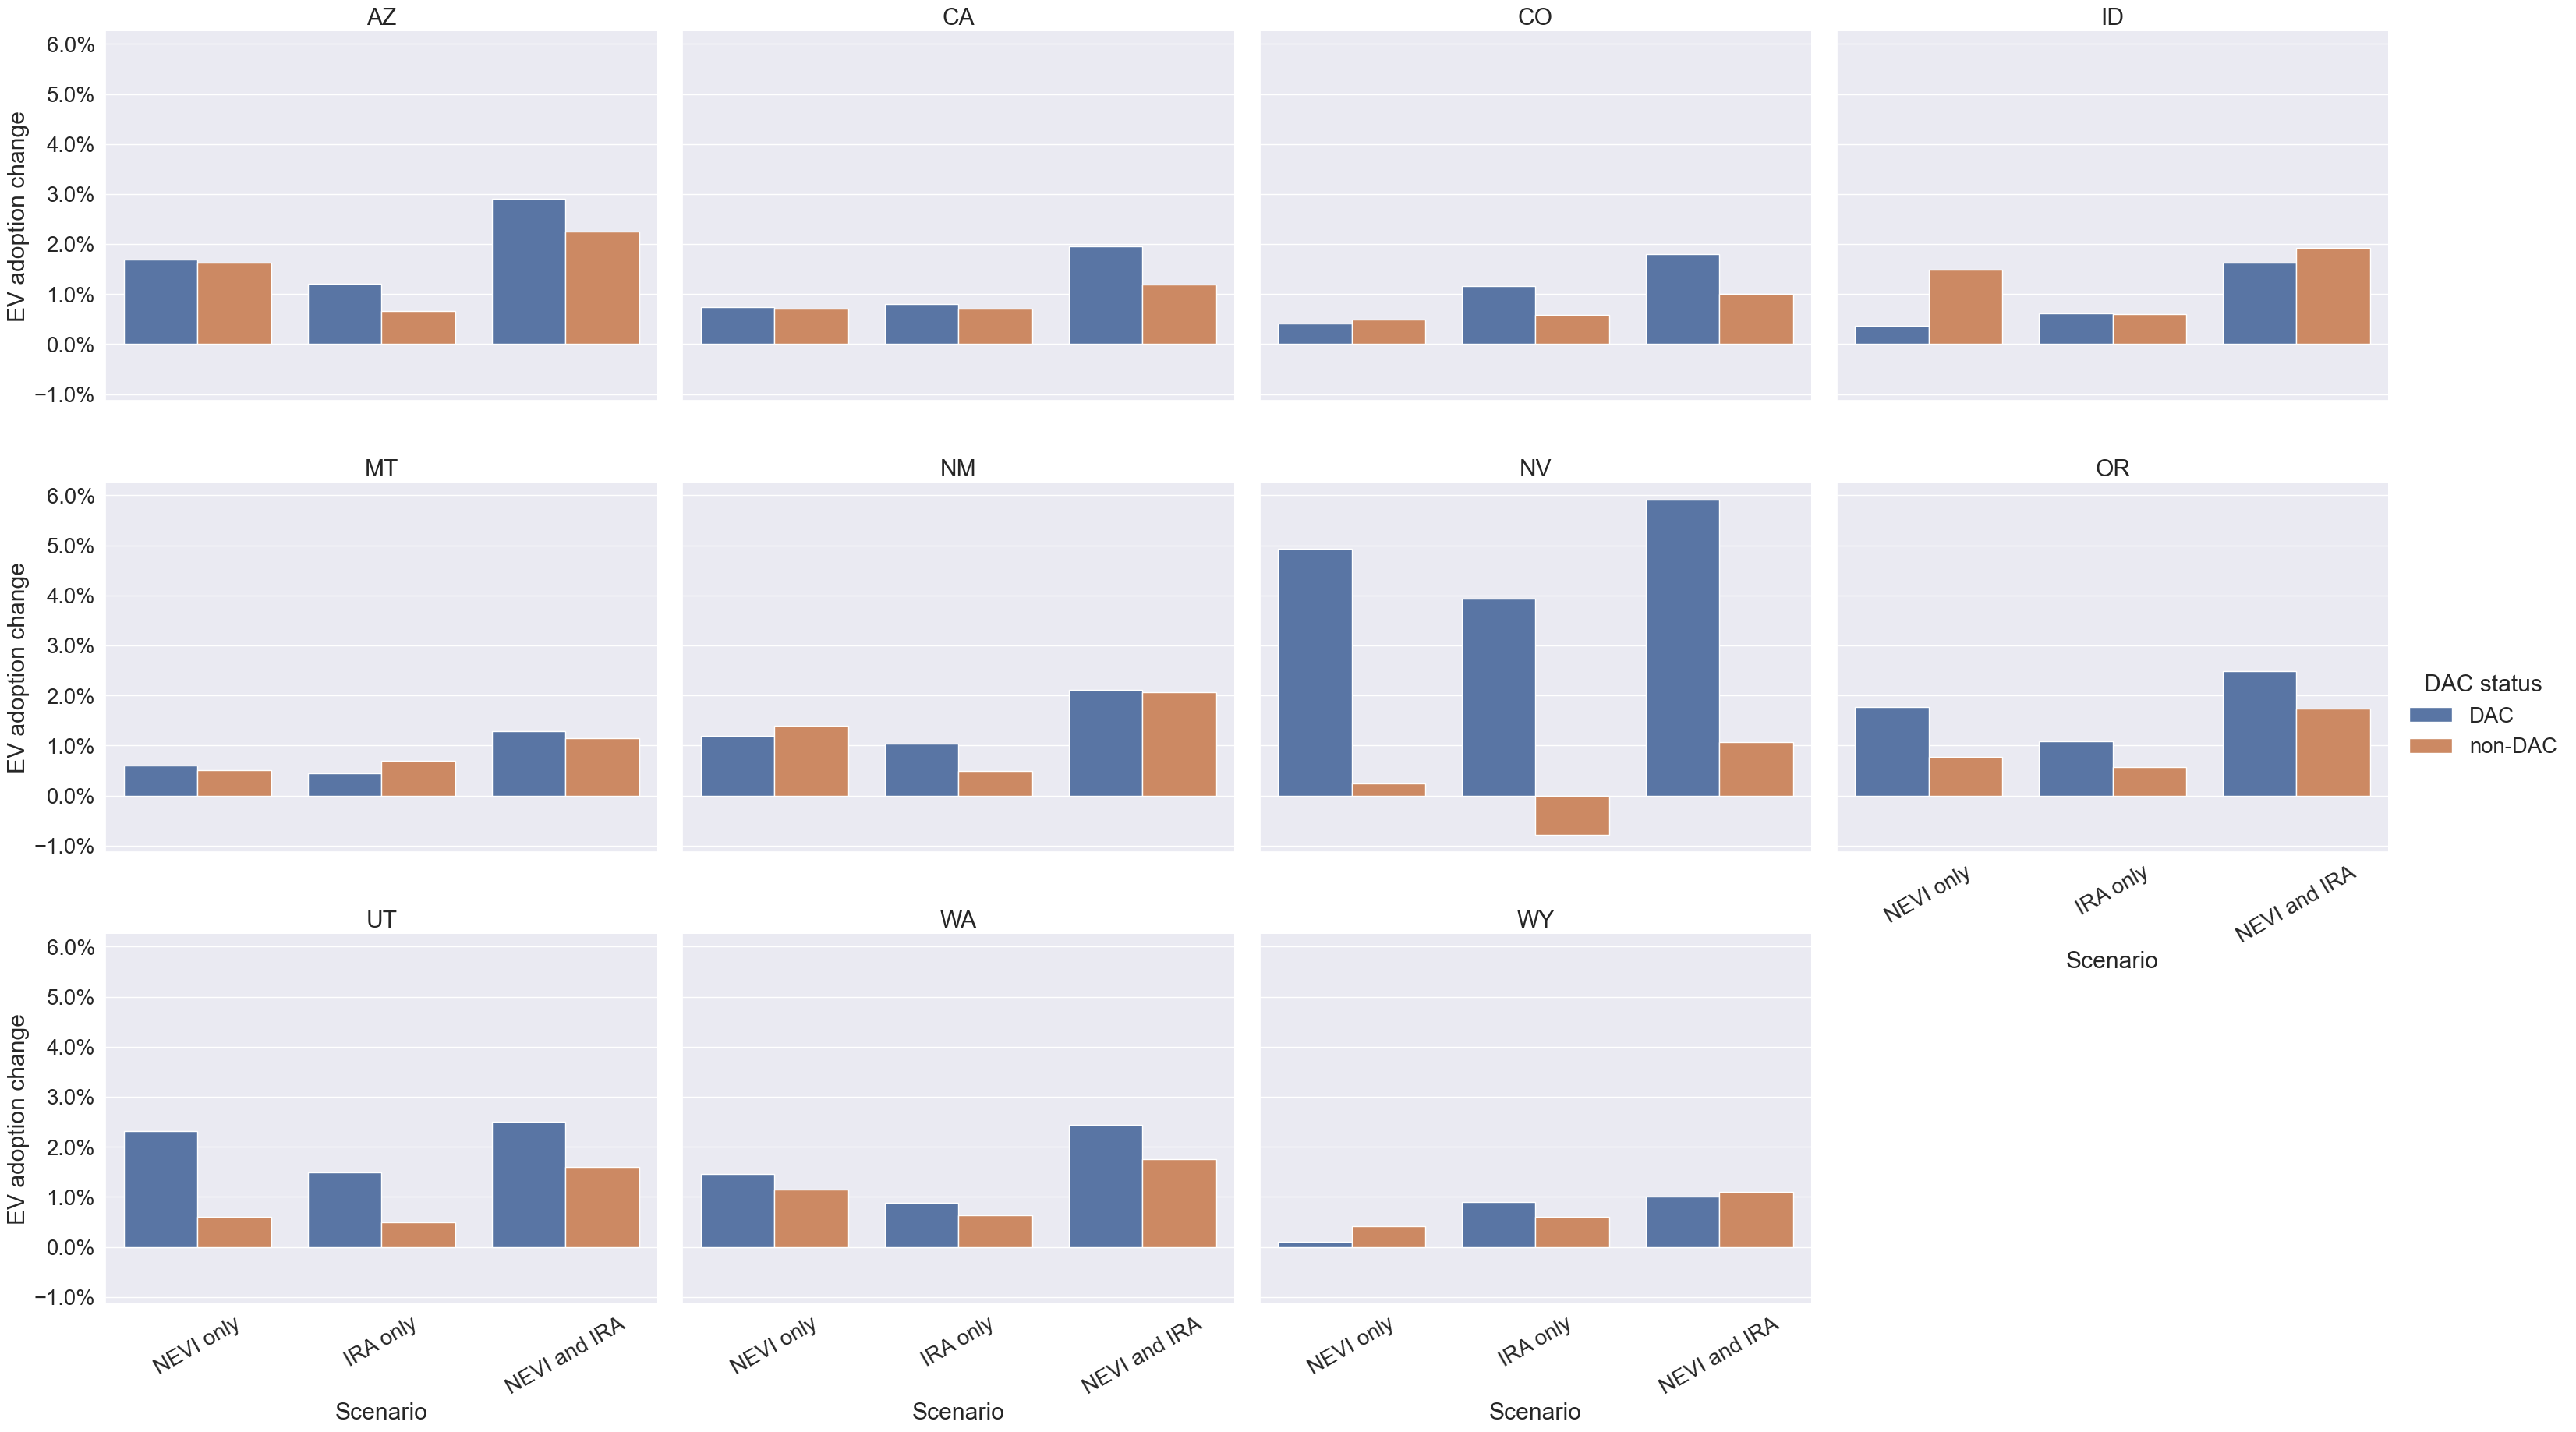

In [22]:
# Plot the ev penetration changes by dac

# Plot the VMT fraction changes by dac and state
EV_adoption_by_dac_state = \
pd.pivot_table(EV_penetration_by_scenario, 
               values=['EV_count', 'Total'], 
               index=['State', 'NEVI_DAC'], 
               columns=['Scenario'], 
               aggfunc=np.sum, fill_value=0)
EV_adoption_by_dac_state = EV_adoption_by_dac_state.reset_index()
EV_adoption_by_dac_state = \
EV_adoption_by_dac_state.loc[EV_adoption_by_dac_state['State'].isin(WECC_states)]
# EV_adoption_by_dac_state.head(5)
EV_adoption_by_dac_state.columns = ['State', 'DAC status', 
                                 'EV Baseline', 
                                 'EV IRA only', 
                                 'EV NEVI and IRA',
                                 'EV NEVI only',
                                 'Total Baseline', 
                                 'Total IRA only', 
                                 'Total NEVI and IRA',
                                 'Total NEVI only']

for scenario in scenarios:
    out_attr = 'EV adoption ' + scenario
    numerator = 'EV ' + scenario
    denominator = 'Total ' + scenario
    EV_adoption_by_dac_state[out_attr] = \
    EV_adoption_by_dac_state[numerator] / \
    EV_adoption_by_dac_state[denominator]

for scenario in scenarios:
    # out_attr = 'EV penetration ' + scenario
    base_frac = 'EV adoption Baseline'
    alt_frac = 'EV adoption ' + scenario
    EV_adoption_by_dac_state[scenario] = \
    EV_adoption_by_dac_state[alt_frac] - \
    EV_adoption_by_dac_state[base_frac]


EV_adoption_by_dac_state_long = pd.melt(EV_adoption_by_dac_state,
                                id_vars=['State', 'DAC status'], 
                                value_vars = scenarios,
                                var_name = 'Scenario', 
                                value_name='EV adoption change')
EV_adoption_by_dac_state_long = \
EV_adoption_by_dac_state_long.reset_index()

# # Create an array with the colors you want to use
colors = ["#e7803e", "#5f74a0"]
dac_lookup = {0: 'non-DAC', 1: 'DAC'}
EV_adoption_by_dac_state_long = \
EV_adoption_by_dac_state_long.loc[EV_adoption_by_dac_state_long['Scenario'] != 'Baseline']
EV_adoption_by_dac_state_long['DAC status'] = \
EV_adoption_by_dac_state_long['DAC status'].astype(int)
EV_adoption_by_dac_state_long['DAC status'] = \
EV_adoption_by_dac_state_long['DAC status'].map(dac_lookup)

EV_adoption_by_dac_state_long.head(5)

# # Set your custom color palette
sns.set_palette(sns.color_palette(colors))
# plt.figure(figsize = (5, 10))
sns.set(font_scale=1.8)  # larger font
EV_adoption_by_dac_state_long = \
EV_adoption_by_dac_state_long.sort_values('EV adoption change')
# EV_adoption_by_dac_state_long = \
# EV_adoption_by_dac_state_long.sort_values('DAC status', ascending = True)
ax = sns.catplot(kind = 'bar', data = EV_adoption_by_dac_state_long,
            x = 'Scenario', y = 'EV adoption change', 
            order = ['NEVI only', 'IRA only', 'NEVI and IRA'],
#             color = '#5797af', 
            hue = 'DAC status', hue_order = ['DAC', 'non-DAC'],
            col = 'State', col_wrap = 4, col_order = WECC_states,
            height=6, aspect=1.3)
# plt.xticks(rotation = 30)
plt.ylabel('EV Adoption Rate Change (%)')
ax.set_titles("{col_name}")
for ax in ax.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    for label in ax.get_xticklabels():
        label.set_rotation(30)
# plt.ylim([0, 0.02])
plt.savefig('Plot/' + region_code + \
            '/' + region_code + '_EV_frac_by_dac_state_delta.png', 
            dpi = 300, bbox_inches = 'tight')
plt.show()

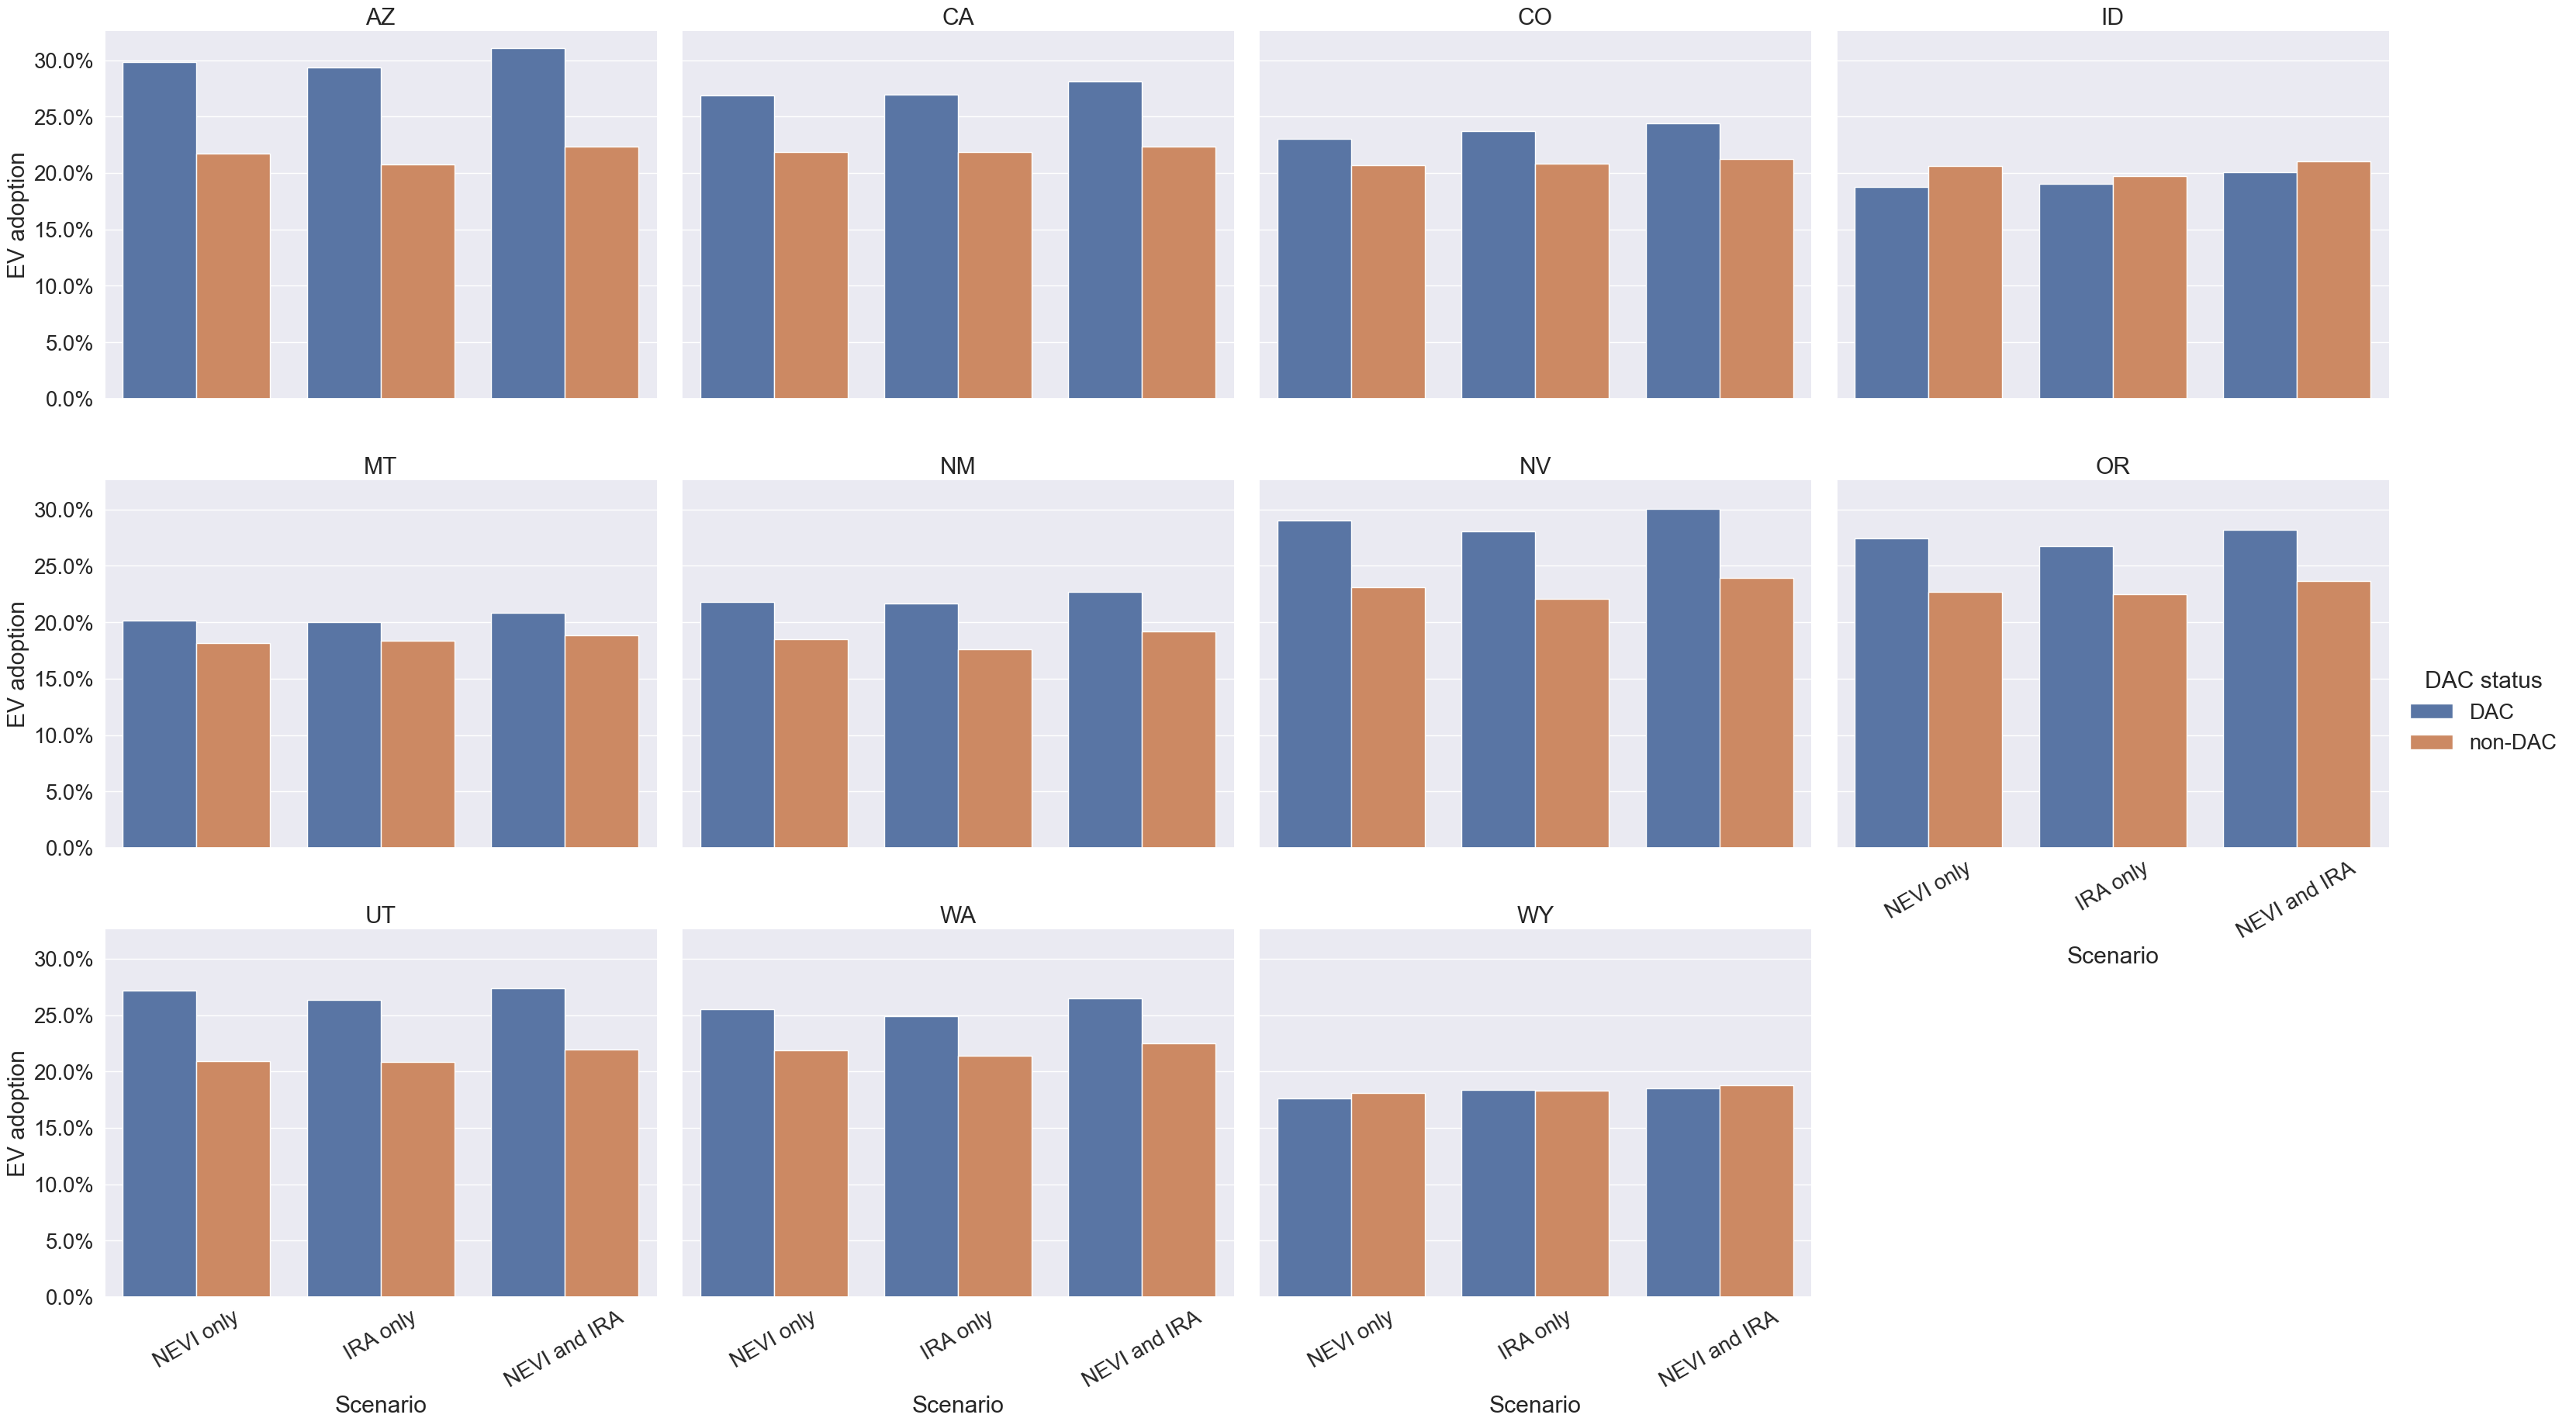

In [26]:
# plot EV penetration by DAC/non-DAC
prefix = 'EV adoption '
adoption_cols = [prefix + s for s in scenarios]
EV_adoption_by_dac_state_long = pd.melt(EV_adoption_by_dac_state,
                                id_vars=['State', 'DAC status'], 
                                value_vars = adoption_cols,
                                var_name = 'Scenario', 
                                value_name='EV adoption')
EV_adoption_by_dac_state_long = \
EV_adoption_by_dac_state_long.reset_index()
EV_adoption_by_dac_state_long.loc[:, 'Scenario'] = \
EV_adoption_by_dac_state_long.loc[:, 'Scenario'].str.split('EV adoption ').str[1]
# # Create an array with the colors you want to use
colors = ["#5f74a0", "#e7803e"]
dac_lookup = {0: 'non-DAC', 1: 'DAC'}
EV_adoption_by_dac_state_long = \
EV_adoption_by_dac_state_long.loc[EV_adoption_by_dac_state_long['Scenario'] != 'Baseline']
EV_adoption_by_dac_state_long['DAC status'] = \
EV_adoption_by_dac_state_long['DAC status'].astype(int)
EV_adoption_by_dac_state_long['DAC status'] = \
EV_adoption_by_dac_state_long['DAC status'].map(dac_lookup)
EV_adoption_by_dac_state_long = \
EV_adoption_by_dac_state_long.sort_values('DAC status')
EV_adoption_by_dac_state_long.head(5)

# # Set your custom color palette
sns.set_palette(sns.color_palette(colors))
# plt.figure(figsize = (5, 10))
sns.set(font_scale=1.8)  # larger font
EV_adoption_by_dac_state_long = \
EV_adoption_by_dac_state_long.sort_values('EV adoption')
ax = sns.catplot(kind = 'bar', data = EV_adoption_by_dac_state_long,
            x = 'Scenario', y = 'EV adoption', 
            order = ['NEVI only', 'IRA only', 'NEVI and IRA'],
#             color = '#5797af', 
            hue = 'DAC status', hue_order = ['DAC', 'non-DAC'],
            col = 'State', col_wrap = 4, col_order = WECC_states,
            height=6, aspect=1.3)
# plt.xticks(rotation = 30)
plt.ylabel('EV Adoption Rate (%)')
ax.set_titles("{col_name}")
for ax in ax.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    for label in ax.get_xticklabels():
        label.set_rotation(30)
# plt.ylim([0, 0.02])
plt.savefig('Plot/' + region_code + \
            '/' + region_code + '_EV_frac_by_dac_state.png', 
            dpi = 300, bbox_inches = 'tight')
plt.show()

In [31]:
EV_adoption_by_dac_state.to_csv('Output/WECC/EV_count_by_scenario_check.csv')

In [24]:
EV_adoption_by_dac_state_long.head(5)

index State DAC status   Scenario  EV adoption change
56     56    NV    non-DAC   IRA only           -0.007926
43     43    WY        DAC  NEVI only            0.000958
34     34    NV    non-DAC  NEVI only            0.002430
29     29    ID        DAC  NEVI only            0.003649
42     42    WY    non-DAC  NEVI only            0.004083

## Part 4 -- visualize EV ownership and EV VMT on map

In [11]:

state_id_lookup_short = state_id_lookup[['GEOID', 'st_code', 'cbsa', 'cbsaname']]
state_id_lookup_short.loc[:, 'GEOID'] = \
state_id_lookup_short.loc[:, 'GEOID'].astype(str).str.zfill(11)
us_tracts_geojson = us_tracts_geojson.merge(state_id_lookup_short, 
                                            on = 'GEOID',
                                            how = 'left')

us_tracts_geojson.head(5)

GEOID                                       NAME  \
0  01001020100  Census Tract 201, Autauga County, Alabama   
1  01001020200  Census Tract 202, Autauga County, Alabama   
2  01001020300  Census Tract 203, Autauga County, Alabama   
3  01001020400  Census Tract 204, Autauga County, Alabama   
4  01001020500  Census Tract 205, Autauga County, Alabama   

                                            geometry  home_GEOID st_code  \
0  MULTIPOLYGON (((-86.50916 32.47344, -86.50620 ...  1001020100      AL   
1  MULTIPOLYGON (((-86.48093 32.48154, -86.47945 ...  1001020200      AL   
2  MULTIPOLYGON (((-86.47087 32.47573, -86.46964 ...  1001020300      AL   
3  MULTIPOLYGON (((-86.45394 32.49318, -86.44742 ...  1001020400      AL   
4  MULTIPOLYGON (((-86.43816 32.45069, -86.43773 ...  1001020500      AL   

      cbsa        cbsaname  
0  33860.0  Montgomery, AL  
1  33860.0  Montgomery, AL  
2  33860.0  Montgomery, AL  
3  33860.0  Montgomery, AL  
4  33860.0  Montgomery, AL

In [10]:
# select data for plotting ev penetration change under scenario
selected_year = 2032
scenario_to_compare = 'NEVI'
# selected_scenario = 'baseline'
output_name_comp = 'year_' + str(selected_year) + '_' + scenario_to_compare
 
criteria_1 = (EV_penetration_by_scenario['year'] == selected_year) & \
(EV_penetration_by_scenario['type'] == 'Baseline') 

ev_penetration_baseline = EV_penetration_by_scenario.loc[criteria_1]
ev_penetration_baseline.loc[:, 'EV_fraction_base'] = \
ev_penetration_baseline.loc[:, 'EV_count'] / \
ev_penetration_baseline.loc[:, 'Total']

ev_penetration_baseline = ev_penetration_baseline[['home_GEOID', 'NEVI_DAC', 'cbsa',
                                                   'EV_fraction_base']]

criteria_2 = (EV_penetration_by_scenario['year'] == selected_year) & \
(EV_penetration_by_scenario['type'] == scenario_to_compare) 
ev_penetration_scenario = EV_penetration_by_scenario.loc[criteria_2]
ev_penetration_scenario.loc[:, 'EV_fraction_alt'] = \
ev_penetration_scenario.loc[:, 'EV_count'] / \
ev_penetration_scenario.loc[:, 'Total']

ev_penetration_scenario = ev_penetration_scenario[['home_GEOID', 
                                                   'EV_fraction_alt']]

ev_penetration_comparison = pd.merge(ev_penetration_baseline, 
                                     ev_penetration_scenario,
                                     on = 'home_GEOID', how = 'left')

ev_penetration_comparison.loc[:, 'EV_fraction_diff'] = \
ev_penetration_comparison.loc[:, 'EV_fraction_alt'] -\
ev_penetration_comparison.loc[:, 'EV_fraction_base']
ev_penetration_comparison['home_GEOID'] = \
ev_penetration_comparison['home_GEOID'].astype(int)
ev_penetration_comparison.head(4)
# print(ev_penetration_to_plot.columns)
# criteria_2 = (EV_VMT_by_scenario['year'] == selected_year) & (EV_VMT_by_scenario['type'] == selected_scenario)
# ev_vmt_to_plot = EV_VMT_by_scenario.loc[criteria_2]

# ev_vmt_to_plot.head(5)

home_GEOID  NEVI_DAC     cbsa  EV_fraction_base  EV_fraction_alt  \
0  6001400100       0.0  41860.0          0.319758         0.333758   
1  6001400200       0.0  41860.0          0.319760         0.333779   
2  6001400300       0.0  41860.0          0.319939         0.334012   
3  6001400400       0.0  41860.0          0.319735         0.334031   

   EV_fraction_diff  
0          0.014000  
1          0.014020  
2          0.014073  
3          0.014296

In [11]:
us_tracts_geojson = us_tracts_geojson.to_crs(epsg=3857)
us_tracts_geojson.head(5)

GEOID                                       NAME  \
0  01001020100  Census Tract 201, Autauga County, Alabama   
1  01001020200  Census Tract 202, Autauga County, Alabama   
2  01001020300  Census Tract 203, Autauga County, Alabama   
3  01001020400  Census Tract 204, Autauga County, Alabama   
4  01001020500  Census Tract 205, Autauga County, Alabama   

                                            geometry  home_GEOID  
0  MULTIPOLYGON (((-9630155.602 3825618.880, -962...  1001020100  
1  MULTIPOLYGON (((-9627012.717 3826687.735, -962...  1001020200  
2  MULTIPOLYGON (((-9625893.070 3825920.525, -962...  1001020300  
3  MULTIPOLYGON (((-9624007.873 3828222.699, -962...  1001020400  
4  MULTIPOLYGON (((-9622251.938 3822616.176, -962...  1001020500

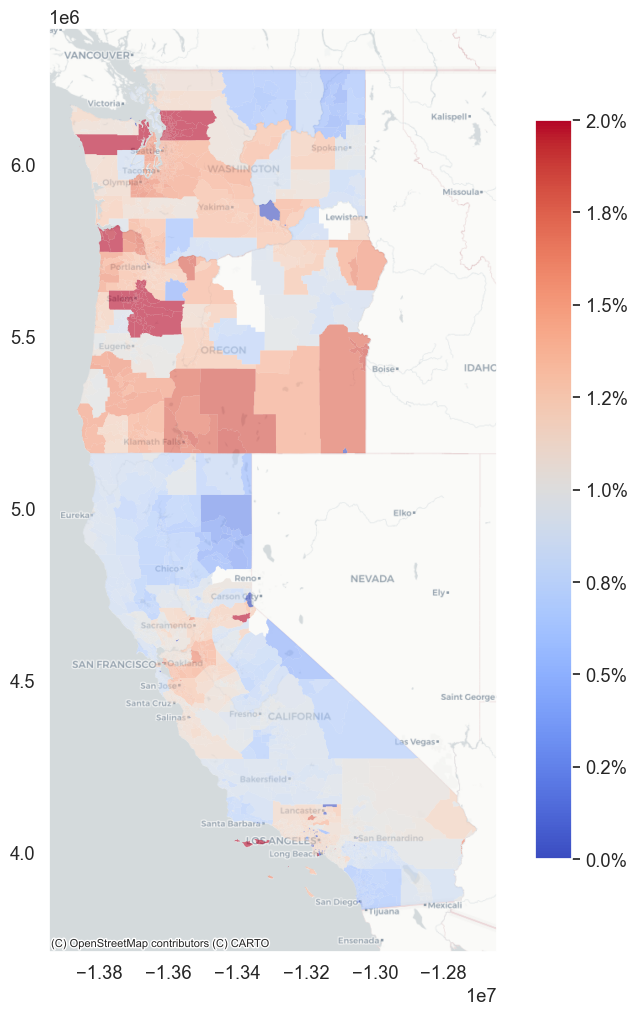

In [19]:
# plot EV penetration change under aggresive scenario
# state_tracts_geojson = \
# us_tracts_geojson.loc[us_tracts_geojson['st_code'] == selected_state]

tracts_with_EV_diff = us_tracts_geojson.merge(ev_penetration_comparison, 
                                            on = 'home_GEOID',
                                            how = 'inner')
tracts_with_EV_diff.loc[:, 'EV_fraction_diff'] *= 100
ax = tracts_with_EV_diff.plot(figsize = (10,12), 
                              column = 'EV_fraction_diff', 
                              cmap='coolwarm',
                            alpha = 0.6, vmin = 0, vmax = 2, 
                              linewidth=0.01, legend=True,
                                legend_kwds = {'shrink': 0.8, 'format': '%.1f%%'})
# tracts_with_EV_diff.plot(ax = ax, facecolor = "none", 
#                          edgecolor='navy', lw=0.03)
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
# cx.add_basemap(ax, crs = tracts_with_EV_diff.crs.to_string(),
#                source = cx.providers.Stamen.TonerLite)
# cx.add_basemap(ax, crs = 'EPSG:4326', zoom =8,
#                source = cx.providers.Stamen.TonerLite)
ax.grid(False)
plt.savefig('Plot/PNW/three_states_map_EV_frac_delta_' + \
            output_name_comp + '.png', dpi = 200)

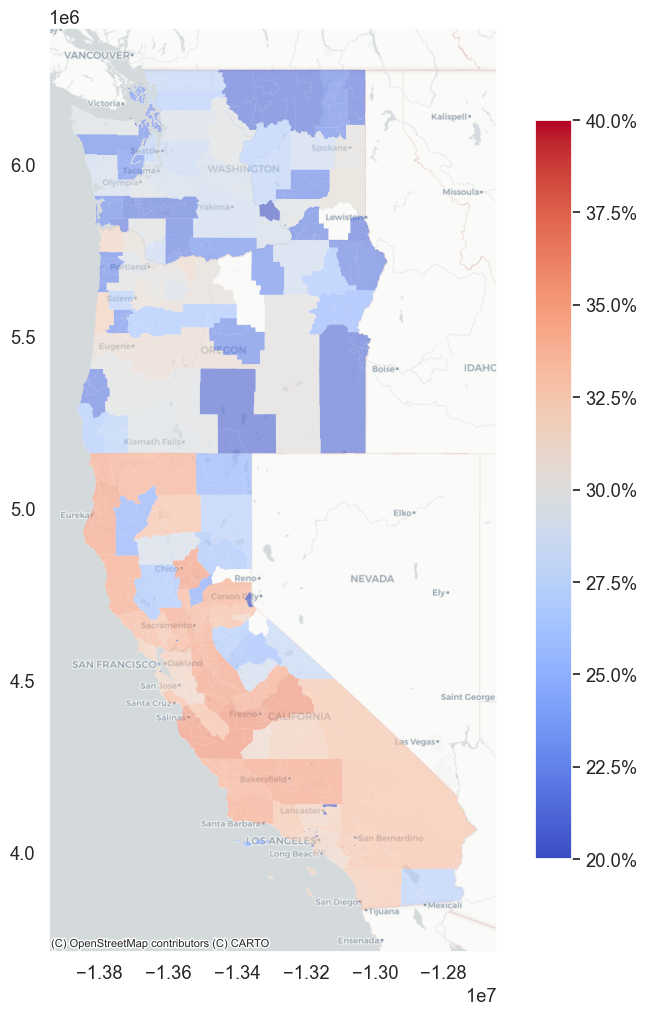

In [20]:
# Plot baseline EV adoption 
tracts_with_EV_diff.loc[:, 'EV_fraction_base'] *= 100
ax = tracts_with_EV_diff.plot(figsize = (10,12), 
                              column = 'EV_fraction_base', 
                              cmap='coolwarm',
                            alpha = 0.6, vmin = 20, vmax = 40, 
                              linewidth=0.01, legend=True,
                                legend_kwds = {'shrink': 0.8, 'format': '%.1f%%'})
# tracts_with_EV_diff.plot(ax = ax, facecolor = "none", 
#                          edgecolor='navy', lw=0.03)
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
ax.grid(False)
plt.savefig('Plot/PNW/three_states_map_EV_frac_base_' + \
            output_name_comp + '.png', dpi = 200)

In [35]:
tracts_to_check = tracts_with_EV_diff.loc[tracts_with_EV_diff['st_code'] == 'WA']
# tracts_to_check.cbsaname.unique()
tracts_to_check.loc[tracts_to_check['cbsaname'] == 'Seattle-Tacoma-Bellevue, WA'].head(5)

GEOID                                        NAME  \
9192  53033000100     Census Tract 1, King County, Washington   
9193  53033000200     Census Tract 2, King County, Washington   
9194  53033000300     Census Tract 3, King County, Washington   
9195  53033000401  Census Tract 4.01, King County, Washington   
9196  53033000402  Census Tract 4.02, King County, Washington   

                                               geometry   home_GEOID st_code  \
9192  MULTIPOLYGON (((-13613986.332 6062679.700, -13...  53033000100      WA   
9193  MULTIPOLYGON (((-13616997.079 6060910.392, -13...  53033000200      WA   
9194  MULTIPOLYGON (((-13619406.590 6062736.471, -13...  53033000300      WA   
9195  MULTIPOLYGON (((-13621156.532 6062738.457, -13...  53033000401      WA   
9196  MULTIPOLYGON (((-13621158.424 6061238.376, -13...  53033000402      WA   

         cbsa                     cbsaname  NEVI_DAC  EV_fraction_base  \
9192  42660.0  Seattle-Tacoma-Bellevue, WA       1.0          0.223463   
9193  42660.0  Seattle-Tacoma-Bellevue, WA       0.0          0.223339   
9194  42660.0  Seattle-Tacoma-Bellevue, WA       0.0          0.223627   
9195  42660.0  Seattle-Tacoma-Bellevue, WA       1.0          0.223312   
9196  42660.0  Seattle-Tacoma-Bellevue, WA       1.0          0.223526   

      EV_fraction_alt  EV_fraction_diff  
9192         0.234132          1.066940  
9193         0.233705          1.036595  
9194         0.234756          1.112924  
9195         0.233979          1.066743  
9196         0.234220          1.069379

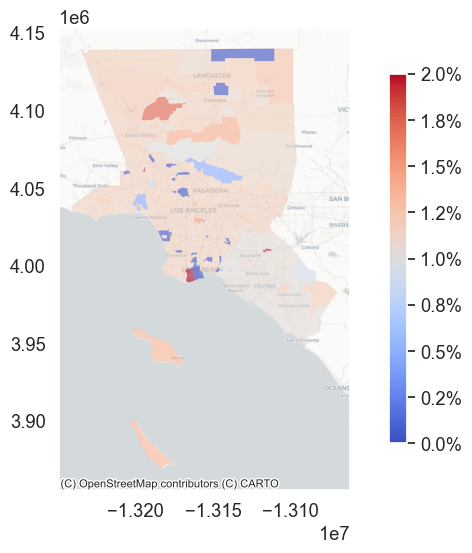

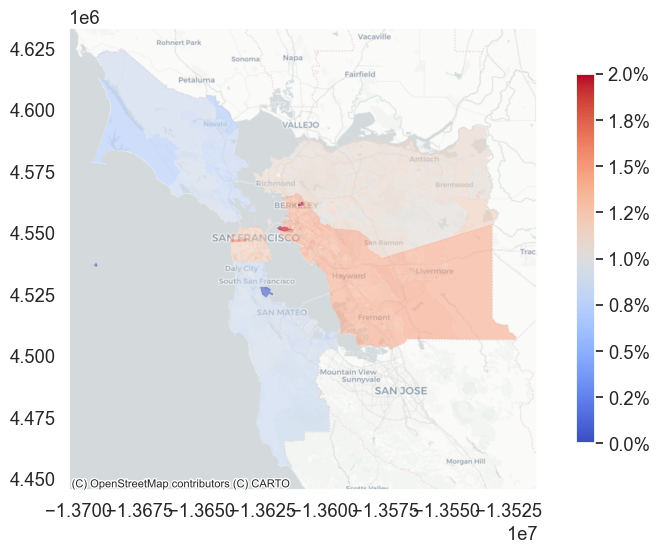

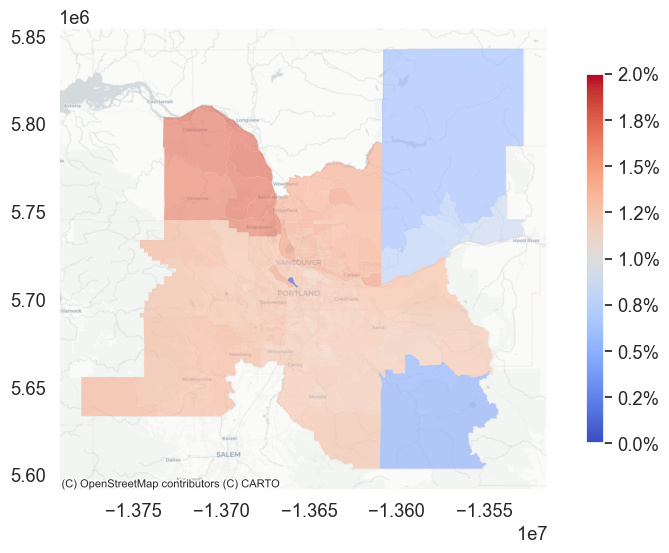

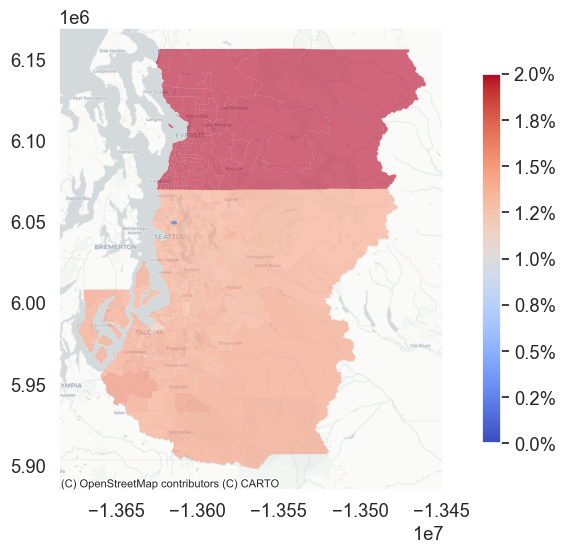

In [15]:
# selected_cbsas = [26420, 19100, 12420] # Houston, Dallas, Austin
selected_cbsas = [31080, 41860, 38900, 42660] # LA, SF, Portland, Seattle
for cbsa in selected_cbsas:
    regional_tracts_with_EV_diff = \
    tracts_with_EV_diff.loc[tracts_with_EV_diff['cbsa'] == cbsa]
    ax = regional_tracts_with_EV_diff.plot(figsize = (10,6), 
                                  column = 'EV_fraction_diff', cmap='coolwarm',
                                alpha = 0.6, vmin = 0, vmax = 2, linewidth=0.01,
                                  legend=True,
                                legend_kwds = {'shrink': 0.8, 'format': '%.1f%%'})
    cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
    ax.grid(False)
    plt.savefig('Plot/PNW/region_' + str(cbsa) + '_EV_frac_delta_' + output_name_comp + '.png', dpi = 200)

In [16]:
# plot EV VMT penetration change under aggregisve scenario
# select data for plotting
selected_year = 2032
scenario_to_compare = 'NEVI'
# selected_scenario = 'baseline'
output_name_comp = 'year_' + str(selected_year) + '_' + scenario_to_compare

criteria_1 = (EV_VMT_by_scenario['year'] == selected_year) & \
(EV_VMT_by_scenario['type'] == 'Baseline') & (EV_VMT_by_scenario['VMT'] >= 5)
ev_vmt_baseline = EV_VMT_by_scenario.loc[criteria_1]
ev_vmt_baseline = ev_vmt_baseline[['thru_GEOID', 'NEVI_DAC', 'cbsa', 'BEV_VMT_fraction']]
ev_vmt_baseline.columns = ['thru_GEOID', 'DACSTS', 'cbsa', 'BEV_VMT_fraction_base']

criteria_2 = (EV_VMT_by_scenario['year'] == selected_year) & \
(EV_VMT_by_scenario['type'] == scenario_to_compare) & (EV_VMT_by_scenario['VMT'] >= 5)
ev_vmt_scenario = EV_VMT_by_scenario.loc[criteria_2]
ev_vmt_scenario = ev_vmt_scenario[['thru_GEOID', 'BEV_VMT_fraction']]
ev_vmt_scenario.columns = ['thru_GEOID', 'BEV_VMT_fraction_alt']

ev_vmt_comparison = pd.merge(ev_vmt_baseline, ev_vmt_scenario,
                                     on = 'thru_GEOID', how = 'left')

ev_vmt_comparison.loc[:, 'EV_vmt_fraction_diff'] = \
ev_vmt_comparison.loc[:, 'BEV_VMT_fraction_alt'] -\
ev_vmt_comparison.loc[:, 'BEV_VMT_fraction_base']

ev_vmt_comparison.head(4)
# print(ev_penetration_to_plot.columns)
# criteria_2 = (EV_VMT_by_scenario['year'] == selected_year) & (EV_VMT_by_scenario['type'] == selected_scenario)
# ev_vmt_to_plot = EV_VMT_by_scenario.loc[criteria_2]

# ev_vmt_to_plot.head(5)

thru_GEOID  DACSTS   cbsa  BEV_VMT_fraction_base  BEV_VMT_fraction_alt  \
0  4001942600     1.0  99999               0.308857              0.319270   
1  4001942700     1.0  99999               0.308764              0.319152   
2  4001944000     1.0  99999               0.311134              0.321610   
3  4001944100     1.0  99999               0.309066              0.319486   

   EV_vmt_fraction_diff  
0              0.010413  
1              0.010388  
2              0.010477  
3              0.010419

In [18]:
ev_vmt_comparison.to_csv('ev_vmt_comparison.csv')

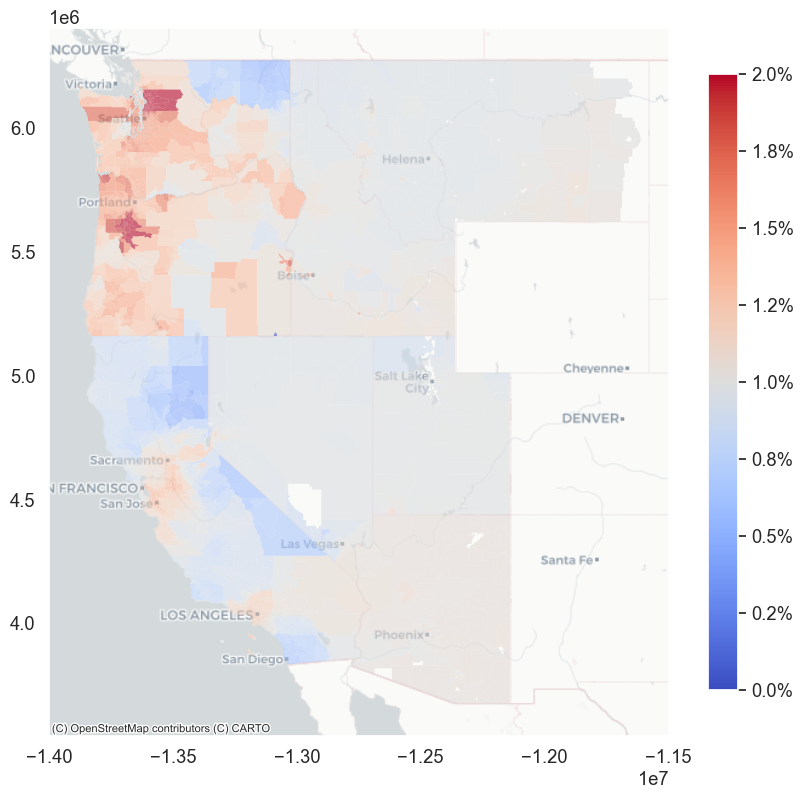

In [21]:
# plot EV VMT penetration change under aggregisve scenario
# state_tracts_geojson = \
# us_tracts_geojson.loc[us_tracts_geojson['st_code'] == selected_state]

tracts_with_EV_diff = us_tracts_geojson.merge(ev_vmt_comparison,
                                                 left_on = 'home_GEOID',
                                                 right_on = 'thru_GEOID',
                                                 how = 'inner')
tracts_with_EV_diff.loc[:, 'EV_vmt_fraction_diff'] *= 100
# dac_boundary = CA_tracts_with_EV_diff.loc[CA_tracts_with_EV_diff['DACSTS'] == 1]
ax = tracts_with_EV_diff.plot(figsize = (10,10), 
                              column = 'EV_vmt_fraction_diff', cmap='coolwarm',
                              alpha = 0.6, vmin = 0, vmax = 2, linewidth=0.01,
                              legend=True,
                              legend_kwds = {'shrink': 0.8, 'format': '%.1f%%'})
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
ax.grid(False)
plt.savefig('Plot/PNW/three_states_map_EV_VMT_frac_delta_' + \
            output_name_comp + '.png', dpi = 200)

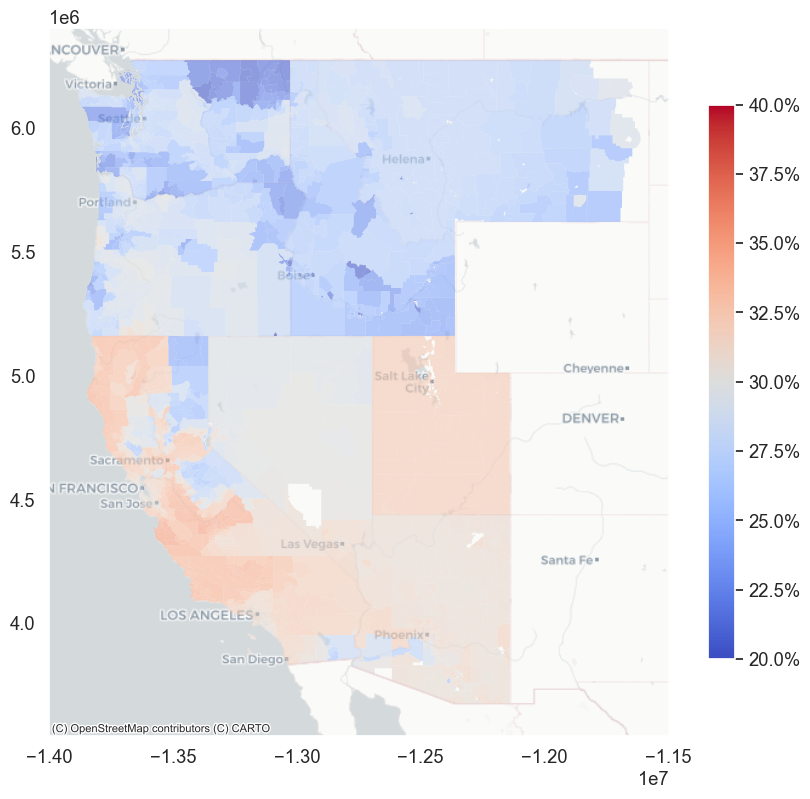

In [28]:
# Plot baseline EV VMT penetration 
#tracts_with_EV_diff.loc[:, 'BEV_VMT_fraction_base'] *= 100
ax = tracts_with_EV_diff.plot(figsize = (10,12), 
                              column = 'BEV_VMT_fraction_base', 
                              cmap='coolwarm',
                            alpha = 0.6, vmin = 20, vmax = 40, 
                              linewidth=0.01, legend=True,
                                legend_kwds = {'shrink': 0.6, 'format': '%.1f%%'})
# tracts_with_EV_diff.plot(ax = ax, facecolor = "none", 
#                          edgecolor='navy', lw=0.03)
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
ax.grid(False)
plt.savefig('Plot/PNW/three_states_map_EV_VMT_frac_base_' + \
            output_name_comp + '.png', dpi = 200)

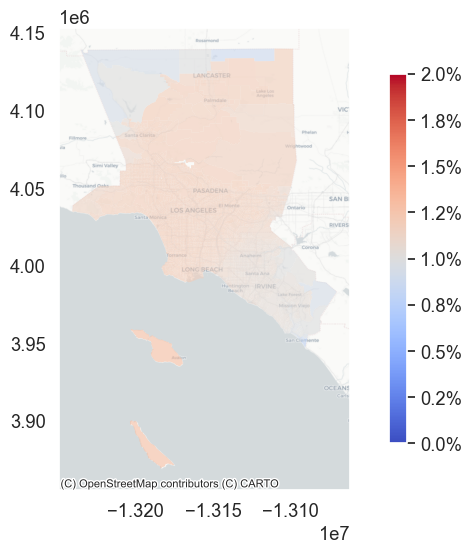

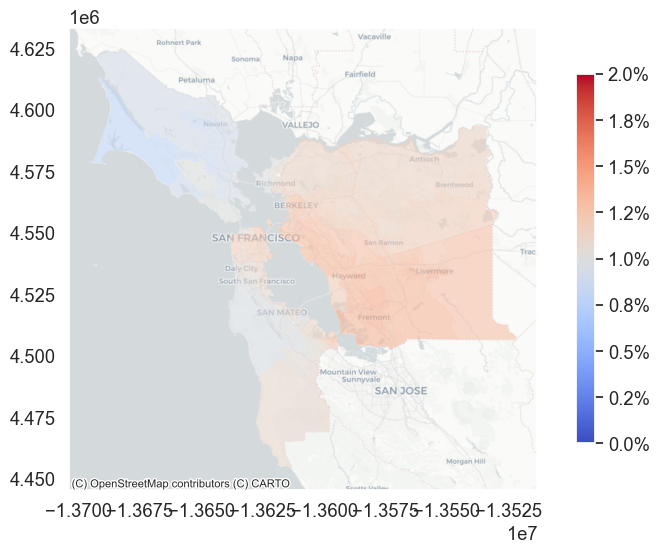

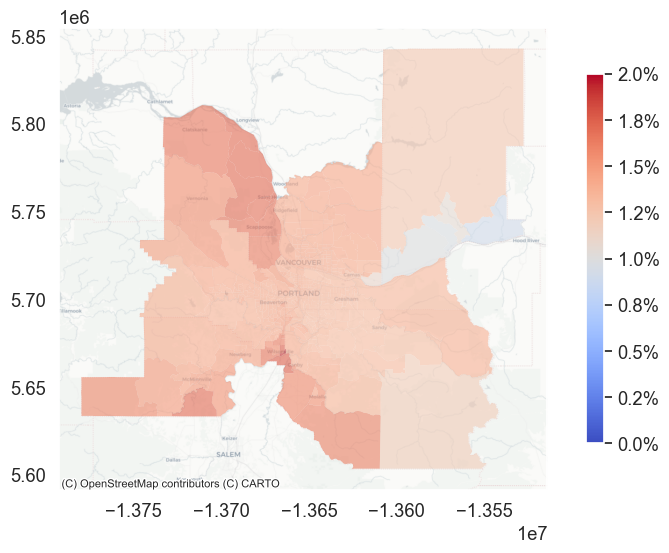

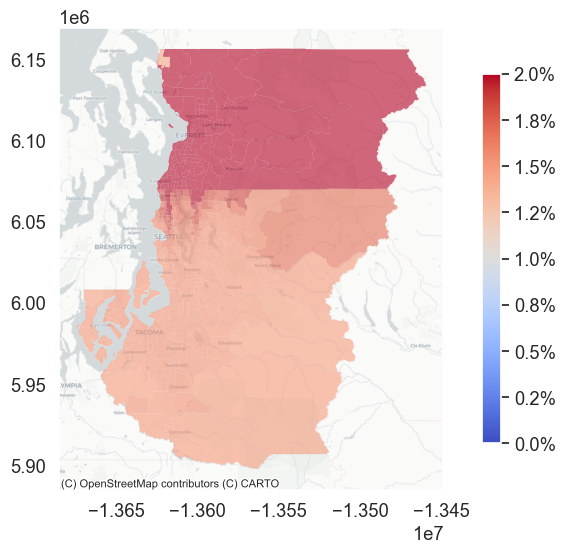

In [26]:
# plot EV VMT penetration change under aggregisve scenario - LA Region
# selected_cbsas = [26420, 19100, 12420] # Houston, Dallas, Austin
selected_cbsas = [31080, 41860, 38900, 42660] # LA, SF, Portland, Seattle
for cbsa in selected_cbsas:
    regional_tracts_with_EV_diff = \
    tracts_with_EV_diff.loc[tracts_with_EV_diff['cbsa'] == cbsa]
    ax = regional_tracts_with_EV_diff.plot(figsize = (10,6), 
                                  column = 'EV_vmt_fraction_diff', cmap='coolwarm',
                                alpha = 0.6, vmin = 0, vmax = 2, linewidth=0.01,
                                  legend=True,
                                legend_kwds = {'shrink': 0.8, 'format': '%.1f%%'})
    cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
    ax.grid(False)
    plt.savefig('Plot/PNW/region_' + str(cbsa) + \
                '_EV_VMT_frac_delta_' + output_name_comp + '.png', dpi = 200)

In [18]:
cx.__version__

'1.4.0'